#2η ομαδική εργασία στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

Ονοματεπώνυμο: **Λάππας Νικόλαος**

ΑΜ: **03121098**

## Θεωρητικό Μέρος

Αφού μελετήσαμε τα άρθρα που μας δόθηκαν, καλούμαστε να παραθέσουμε συγκεντρωτικά ορισμένα στοιχεία σε έναν πίνακα, σχετικά με τα διαφορετικά Neural Networks που παρουσιάστηκαν στα άρθρα αυτά.

### Πίνακας CNN Αρχιτεκτονικών

| Χαρακτηριστικό               | LeNet                               | AlexNet                                            | VGG                                     |
|-----------------------------|-------------------------------------|----------------------------------------------------|-----------------------------------------|
| **Επίπεδα**                 | 7 (2×Conv, 2×Pool, 3×FC)            | 11 (5×Conv, 3×Pool, 3×FC)        | 16 (8×Conv, 5×Pool, 3×FC)                     |
| **Μέγεθος Φίλτρων**         | 5×5                                 | 11×11×3, 5×5×3, 3×3×3                            | 3×3                                     |
| **Ενεργοποίηση**            | Sigmoid                             | ReLU                                               | ReLU                                    |
| **Dropout**                 | Όχι                                 | Ναι (στα FC)                                       | Ναι (στα FC)                            |
| **Pooling**                 | Average (2×2)                       | Max (3×3, stride 2)                                | Max (2×2, stride 2)                     |
| **Παράμετροι**              | 2578 (independent)                  | ~60M                                               | ~138M                                   |
| **Κανονικοποίηση**          | Όχι                                 | LRN (σε κάποιες conv layers)                      | Όχι (ήπια χρήση σε κάποια εκδοχή)       |
| **Input Μέγεθος**           | 28×28 grayscale                     | 224×224 RGB                                        | 224×224 RGB                             |


**Σχολιασμός:** Παρατηρούμε, αρχικά, ότι το δίκτυο **LeNet** είναι αυτό που διαφέρει περισσότερο από τα υπόλοιπα, και αυτό αιτιολογείται από το ότι υλοποιήθηκε παλαιότερα από τα άλλα. Συγκεκριμένα βλέπουμε ότι είναι το μόνο που χρησιμοποιεί την sigmoid ως συνάρτηση ενεργοποίησης, και πως δεν χρησιμοποιεί την τεχνική dropout. Βλέπουμε, επίσης, ότι έχει το μικρότερο βάθος συγκριτικά με τα άλλα δυο. Το νευρωνικό αυτό ωστόσο, ήταν πρωταρχικό για την εποχή του, αλλά περιορίζεται σε απλά tasks όπως η αναγνώριση ψηφίων.

Τα δίκτυα **AlexNet** και **VGG** χρησιμοποιούν και τα δύο την ReLU σαν συνάρτηση ενεργοποίησης, κάτι που συμβάλει στην ακρίβεια των μοντέλων και στην ταχύτερη εκπαίδευσή τους. Αυτό έδωσε την δυνατότητα στην ανάπτυξη βαθύτερων νευρωνικών, όπως το very Deep VGG, τα οποία όπως απέδειξαν οι συντάκτες του άρθρου με τίτλο "VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION", οδηγούν σε πολύ καλύτερα και ακριβή αποτελέσματα, όχι μόνο στο συγκεκριμένο dataset με το οποίο ασχολήθηκαν, αλλά και σε διαφορετικής έκτασης dataset.

Τα τελευταία δυο νευρωνικά κάνουν επιπλέον χρήση της dropout τεχνικής, μια τεχνική regularization, με την οποία με πιθανότητα 0.5 ορισμένοι νευρώνες του δικτύου σταματάνε να επιδρούν τόσο στο forward pass όσο και στο back-propagation για την εκάστοτε εποχή. Αποτέλεσμα αυτού είναι η αποφυγή του overfitting, αφού παύει να βασίζεται σε συγκερκιμένους μόνο νευρώνες το νευρωνικό. Παράλληλα, τα δυο αυτά νευρωνικά κάνουν χρήση της max pooling τεχνικής η οποία είναι πιο discriminative σε σχέση με την average pooling που έχει σαν αποτέλεσμα μια περισσότερο γενική αναπαράσταση του αποτελέσματος.

Τέλος, το **VGG** φαίνεται να έχει προκαλέσει την μεγαλύτερη επανάσταση από τις τρεις αυτές διαφορετικές αρχιτεκτονικές για νευρωνικό δίκτυο. Ερευνητές έχουν χρησιμοποιήσει την δομή του και βασίζονται στο ότι βαθύτερα νευρωνικά με μικρότερα (3×3) convolutional filters μπορούν να αποδώσουν καλύτερα και πιο λεπτομερή χαρακτηριστικά και μοτίβα μιας εικόνας. Ωστόσο μια τέτοια προσέγγιση συνοδεύεται από χρήση αριθμητικά περισσότερων παραμέτρων σε σχέση με τα **LeNet** και **AlexNet**.

## Υλοποίηση Αλγορίθμου

In [ ]:
!pip install tensorflow

### Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [ ]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας.

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 98

In [ ]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

In [ ]:
import requests
from io import StringIO

headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(cifar100_classes_url, headers=headers)

if response.status_code == 200:
    team_classes = pd.read_csv(StringIO(response.text), sep=',', header=None)
    print("Successfully loaded team_classes")
else:
    raise Exception(f"Failed to fetch team_classes: {response.status_code}")


Successfully loaded team_classes


In [ ]:
labels_url = 'https://pastebin.com/raw/qgDaNggt'
headers = {'User-Agent': 'Mozilla/5.0'}

response = requests.get(labels_url, headers=headers)

if response.status_code == 200:
    CIFAR100_LABELS_LIST = pd.read_csv(StringIO(response.text), sep=',', header=None).astype(str).values.tolist()[0]
    print("CIFAR-100 label list loaded")
else:
    raise Exception(f"Failed to fetch label list: {response.status_code}")


CIFAR-100 label list loaded


Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
# team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
# CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)

[' baby', ' bottle', ' bowl', ' boy', ' bridge', ' butterfly', ' caterpillar', ' couch', ' lawn_mower', ' motorcycle', ' orchid', ' possum', ' rabbit', ' raccoon', ' road', ' shark', ' spider', ' squirrel', ' sweet_pepper', ' tulip']


In [ ]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


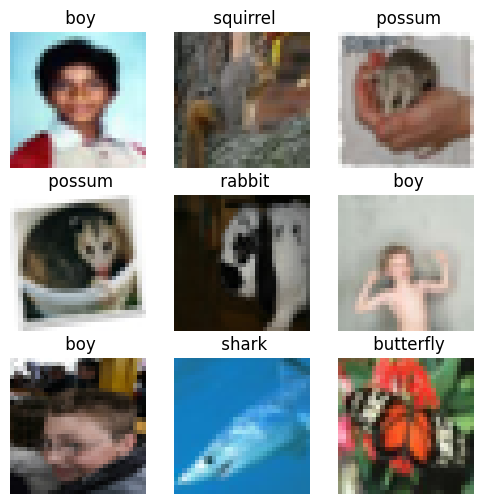

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
  plt.axis('off')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the labels for each dataset
y_val_to20 = label_encoder.fit_transform(y_val)
y_train_to20 = label_encoder.transform(y_train)
y_test_to20 = label_encoder.transform(y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
print(y_val_to20[1])
print(y_val[1])
print(y_test_to20[1].shape)
print(y_val[1].shape)

print(y_val_to20)

19
[92]
()
(1,)
[ 4 19 15 ... 11 17 15]


## Ερώτημα 1
---
### Βήμα 1: Σχεδίαση και εκπαίδευση των μοντέλων

 Σχεδίαστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας τον ίδιο αλγορίθμο βελτιστοποίησης ([optimizer](https://keras.io/api/optimizers/)), την ίδια συνάρτηση κόστους [loss function](https://keras.io/api/losses/), το ίδιο μέγεθος παρτίδας (batch size) και 50 εποχές (epochs) `*`.

 Για την εκτίμηση της απόδοσης των μοντέλων να χρησιμοποιήσετε ως μετρική ([metrics](https://keras.io/api/metrics/)) την F1-score.


`*`
 Μπορείτε να πειραματιστείτε με τον optimizer, την loss function και το batch size για τα 4 μοντέλα πριν καταλήξετε στην τελική σας κοινή, για όλα τα μοντέλα επιλογή.


---
  
### Βήμα 2: Αξιολόγηση των μοντέλων

α. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε στο Βήμα 1, απεικονίστε σε κοινό διάγραμμα τα F1-scores εκπαίδευσης και επικύρωσης στο σύνολο των εποχών.

β. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων.
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
---

### Βήμα 3: Αξιολόγηση F1-score
Αξιολογήστε τα F1-scores, χρησιμοποιώντας το σύνολο ελέγχου σας (test set).

---

**Υλοποίηση Βήμα 1**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**LeNet**

In [ ]:
# LeNet Architecture
def LeNet_NN():
  model = models.Sequential([
      layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same'),
      layers.AvgPool2D(pool_size=2, strides=2),
      layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'),
      layers.AvgPool2D(pool_size=2, strides=2),
      layers.Flatten(),
      layers.Dense(units=120, activation='sigmoid'),
      layers.Dense(units=84, activation='sigmoid'),
      layers.Dense(20, activation="softmax")
  ])
  return model

In [ ]:
print("Layer Output Shapes:")
X = tf.random.uniform((1, 28, 28, 1))
for layer in LeNet_NN().layers:
  X = layer(X)
  print(f"{layer.__class__.__name__:<20} output shape:\t{X.shape}")

Layer Output Shapes:
Conv2D               output shape:	(1, 28, 28, 6)
AveragePooling2D     output shape:	(1, 14, 14, 6)
Conv2D               output shape:	(1, 10, 10, 16)
AveragePooling2D     output shape:	(1, 5, 5, 16)
Flatten              output shape:	(1, 400)
Dense                output shape:	(1, 120)
Dense                output shape:	(1, 84)
Dense                output shape:	(1, 20)


In [ ]:
def preprocess_images(images, target_size=(28, 28)):
  # Convert to grayscale
  images_gray = tf.image.rgb_to_grayscale(images)
  # Resize
  images_resized = tf.image.resize(images_gray, target_size)
  return images_resized

In [ ]:
x_train_resized28 = preprocess_images(x_train)
x_val_resized28 = preprocess_images(x_val)
x_test_resized28 = preprocess_images(x_test)

In [ ]:
# Training Set 1 (Trained with CPU)
from tensorflow.keras.optimizers import SGD

sgd_optimizer = SGD(learning_rate=0.1, momentum=0.9)

LeNet_model1 = LeNet_NN()
LeNet_model1.compile(
    optimizer=sgd_optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
LeNet_results1 = LeNet_model1.fit(
    x_train, y_train_to20, epochs=50, batch_size=10, validation_data=(x_val, y_val_to20)
)

Epoch 1/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.0432 - loss: 3.0515 - val_accuracy: 0.0520 - val_loss: 3.0179
Epoch 2/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.0514 - loss: 3.0213 - val_accuracy: 0.0460 - val_loss: 3.0270
Epoch 3/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.0463 - loss: 3.0204 - val_accuracy: 0.0600 - val_loss: 3.0162
Epoch 4/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.0501 - loss: 3.0190 - val_accuracy: 0.0547 - val_loss: 3.0395
Epoch 5/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.0490 - loss: 3.0201 - val_accuracy: 0.0447 - val_loss: 3.0195
Epoch 6/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0516 - loss: 3.0184 - val_accuracy: 0.0467 - val_loss: 3.0476
Epoch 7/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.0423 - loss: 3.0243 - val_accuracy: 0.0467 - val_loss: 3.0213
Epoch 8/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.0516 - loss: 3.0217 - v

In [ ]:
# Training Set 2 (Trained with CPU)
LeNet_model2 = LeNet_NN()
LeNet_model2.compile(
    optimizer='Nadam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
LeNet_results2 = LeNet_model2.fit(
    x_train, y_train_to20, epochs=50, batch_size=128, validation_data=(x_val, y_val_to20)
)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.0455 - loss: 3.0317 - val_accuracy: 0.0553 - val_loss: 3.0067
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.0526 - loss: 3.0028 - val_accuracy: 0.0553 - val_loss: 2.9899
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.0780 - loss: 2.9577 - val_accuracy: 0.1173 - val_loss: 2.8471
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.1347 - loss: 2.8016 - val_accuracy: 0.1473 - val_loss: 2.7397
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.1655 - loss: 2.7064 - val_accuracy: 0.1740 - val_loss: 2.6758
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.1882 - loss: 2.6519 - val_accuracy: 0.2040 - val_loss: 2.6261
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.2087 - loss: 2.5852 - val_accuracy: 0.2047 - val_loss: 2.5840
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.2308 - loss: 2.5386 - val_accuracy: 0.

In [ ]:
# Training Set 1 (Trained with GPU)
from tensorflow.keras.optimizers import SGD

sgd_optimizer = SGD(learning_rate=0.1, momentum=0.9)

LeNet_model1 = LeNet_NN()
LeNet_model1.compile(
    optimizer=sgd_optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
LeNet_results1 = LeNet_model1.fit(
    x_train_resized28, y_train_to20, epochs=50, batch_size=10, validation_data=(x_val_resized28, y_val_to20)
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


850/850 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0426 - loss: 3.0584 - val_accuracy: 0.0427 - val_loss: 3.0411
Epoch 2/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0512 - loss: 3.0182 - val_accuracy: 0.0447 - val_loss: 3.0176
Epoch 3/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0474 - loss: 3.0192 - val_accuracy: 0.0527 - val_loss: 3.0351
Epoch 4/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0507 - loss: 3.0164 - val_accuracy: 0.0407 - val_loss: 3.0391
Epoch 5/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0465 - loss: 3.0205 - val_accuracy: 0.0460 - val_loss: 3.0159
Epoch 6/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0511 - loss: 3.0184 - val_accuracy: 0.0547 - val_loss: 3.0055
Epoch 7/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0586 - loss: 3.0192 - val_accuracy: 0.0467 - val_loss: 3.0182
Epoch 8/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0562 - loss: 3.0211 - val_accuracy: 0.0527 - val_

In [ ]:
# Training Set 2 (Trained with GPU)
LeNet_model2 = LeNet_NN()
LeNet_model2.compile(
    optimizer='Nadam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
LeNet_results2 = LeNet_model2.fit(
    x_train_resized28, y_train_to20, epochs=50, batch_size=128, validation_data=(x_val_resized28, y_val_to20)
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.0508 - loss: 3.0461 - val_accuracy: 0.0447 - val_loss: 3.0079
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0517 - loss: 3.0014 - val_accuracy: 0.0553 - val_loss: 3.0014
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0503 - loss: 3.0021 - val_accuracy: 0.0460 - val_loss: 2.9999
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0451 - loss: 3.0023 - val_accuracy: 0.0467 - val_loss: 3.0032
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0509 - loss: 3.0010 - val_accuracy: 0.0453 - val_loss: 2.9989
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0621 - loss: 2.9880 - val_accuracy: 0.0987 - val_loss: 2.9544
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1132 - loss: 2.9268 - val_accuracy: 0.1180 - val_loss: 2.8844
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1327 - loss: 2.8531 - val_accuracy: 0.1553 - val_loss: 2.8115
Ep

In [ ]:
# Training Set 3 (Trained with GPU)
LeNet_model3 = LeNet_NN()
LeNet_model3.compile(
    optimizer='RMSprop',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
LeNet_results3 = LeNet_model3.fit(
    x_train_resized28, y_train_to20, epochs=50, batch_size=10, validation_data=(x_val_resized28, y_val_to20)
)

Epoch 1/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0523 - loss: 3.0293 - val_accuracy: 0.0713 - val_loss: 3.0093
Epoch 2/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0758 - loss: 2.9699 - val_accuracy: 0.1367 - val_loss: 2.8538
Epoch 3/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1374 - loss: 2.8000 - val_accuracy: 0.1527 - val_loss: 2.7481
Epoch 4/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1733 - loss: 2.7351 - val_accuracy: 0.1647 - val_loss: 2.6959
Epoch 5/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1730 - loss: 2.6917 - val_accuracy: 0.1867 - val_loss: 2.6670
Epoch 6/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1855 - loss: 2.6572 - val_accuracy: 0.1773 - val_loss: 2.6525
Epoch 7/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1953 - loss: 2.6397 - val_accuracy: 0.1847 - val_loss: 2.6311
Epoch 8/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1972 - loss: 2.6158 - val_accuracy: 0.

**AlexNet**

In [ ]:
# AlexNet Architecture
def AlexNet_NN():
  model = models.Sequential([
      layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu'),
      layers.MaxPool2D(pool_size=3, strides=2),
      layers.Conv2D(filters=256, kernel_size=5, activation='relu', padding='same'),
      layers.MaxPool2D(pool_size=3, strides=2),
      layers.Conv2D(filters=384, kernel_size=3, activation='relu', padding='same'),
      layers.Conv2D(filters=384, kernel_size=3, activation='relu', padding='same'),
      layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
      layers.MaxPool2D(pool_size=3, strides=2),
      layers.Flatten(),
      layers.Dense(units=4096, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(units=4096, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(20, activation="softmax")
  ])
  return model

In [ ]:
print("Layer Output Shapes:")
Y = tf.random.uniform((1, 224, 224, 3))
for layer in AlexNet_NN().layers:
  Y = layer(Y)
  print(f"{layer.__class__.__name__:<20} output shape:\t{Y.shape}")

Layer Output Shapes:
Conv2D               output shape:	(1, 54, 54, 96)
MaxPooling2D         output shape:	(1, 26, 26, 96)
Conv2D               output shape:	(1, 26, 26, 256)
MaxPooling2D         output shape:	(1, 12, 12, 256)
Conv2D               output shape:	(1, 12, 12, 384)
Conv2D               output shape:	(1, 12, 12, 384)
Conv2D               output shape:	(1, 12, 12, 256)
MaxPooling2D         output shape:	(1, 5, 5, 256)
Flatten              output shape:	(1, 6400)
Dense                output shape:	(1, 4096)
Dropout              output shape:	(1, 4096)
Dense                output shape:	(1, 4096)
Dropout              output shape:	(1, 4096)
Dense                output shape:	(1, 20)


In [ ]:
def resize_images(images, target_size=(224, 224)):
  return tf.image.resize(images, target_size)

In [ ]:
x_train_resized = resize_images(x_train)
x_val_resized = resize_images(x_val)
x_test_resized = resize_images(x_test)

In [ ]:
# Training Set 1
AlexNet_model1 = AlexNet_NN()
AlexNet_model1.compile(
    optimizer='SGD',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
AlexNet_results1 = AlexNet_model1.fit(
    x_train_resized, y_train_to20, epochs=50, batch_size=10, validation_data=(x_val_resized, y_val_to20)
)

Epoch 1/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 29s 26ms/step - accuracy: 0.0673 - loss: 2.9634 - val_accuracy: 0.1340 - val_loss: 2.7516
Epoch 2/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.1551 - loss: 2.7236 - val_accuracy: 0.1987 - val_loss: 2.6459
Epoch 3/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.2347 - loss: 2.4644 - val_accuracy: 0.2813 - val_loss: 2.2885
Epoch 4/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.2873 - loss: 2.2802 - val_accuracy: 0.3060 - val_loss: 2.1648
Epoch 5/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.3437 - loss: 2.0865 - val_accuracy: 0.3693 - val_loss: 2.0164
Epoch 6/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.3878 - loss: 1.9430 - val_accuracy: 0.3873 - val_loss: 1.9393
Epoch 7/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.4356 - loss: 1.8038 - val_accuracy: 0.4140 - val_loss: 1.8992
Epoch 8/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.4515 - loss: 1.7183 - 

In [ ]:
# Training Set 2
AlexNet_model2 = AlexNet_NN()
AlexNet_model2.compile(
    optimizer='Adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
AlexNet_results2 = AlexNet_model2.fit(
    x_train_resized, y_train_to20, epochs=50, batch_size=128, validation_data=(x_val_resized, y_val_to20)
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


67/67 ━━━━━━━━━━━━━━━━━━━━ 44s 377ms/step - accuracy: 0.0501 - loss: 3.2042 - val_accuracy: 0.0480 - val_loss: 2.9878
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.0859 - loss: 2.9274 - val_accuracy: 0.1120 - val_loss: 2.8640
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.1454 - loss: 2.7672 - val_accuracy: 0.1993 - val_loss: 2.5346
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.2202 - loss: 2.5097 - val_accuracy: 0.2573 - val_loss: 2.3652
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.2762 - loss: 2.3053 - val_accuracy: 0.3047 - val_loss: 2.2116
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.3267 - loss: 2.1494 - val_accuracy: 0.3213 - val_loss: 2.1330
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.3543 - loss: 2.0127 - val_accuracy: 0.3400 - val_loss: 2.0784
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - accuracy: 0.3848 - loss: 1.9631 - val_accuracy: 0.3773 -

**VGG**

In [ ]:
# VGG Architecture
def VGG_NN():
  model = models.Sequential([
      # Convolutional Blocks
      layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(224, 224, 3)),
      layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
      layers.MaxPool2D(pool_size=2, strides=2),

      layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
      layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
      layers.MaxPool2D(pool_size=2, strides=2),

      layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
      layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
      layers.MaxPool2D(pool_size=2, strides=2),

      layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
      layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
      layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
      layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
      layers.MaxPool2D(pool_size=2, strides=2),

      # Flatten and Fully Connected layers
      # layers.Flatten(), # I did not have the computational power for the amount of parameters
      layers.GlobalAveragePooling2D(), # Almost the same as doing the Flatten() ...
      layers.Dense(units=4096, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(units=4096, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(20, activation="softmax")
  ])
  return model

In [ ]:
print("Layer Output Shapes:")
Z = tf.random.uniform((1, 224, 224, 3))
for layer in VGG_NN().layers:
  Z = layer(Z)
  print(f"{layer.__class__.__name__:<20} output shape:\t{Z.shape}")

Layer Output Shapes:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Conv2D               output shape:	(1, 224, 224, 64)
Conv2D               output shape:	(1, 224, 224, 64)
MaxPooling2D         output shape:	(1, 112, 112, 64)
Conv2D               output shape:	(1, 112, 112, 128)
Conv2D               output shape:	(1, 112, 112, 128)
MaxPooling2D         output shape:	(1, 56, 56, 128)
Conv2D               output shape:	(1, 56, 56, 256)
Conv2D               output shape:	(1, 56, 56, 256)
MaxPooling2D         output shape:	(1, 28, 28, 256)
Conv2D               output shape:	(1, 28, 28, 512)
Conv2D               output shape:	(1, 28, 28, 512)
Conv2D               output shape:	(1, 28, 28, 512)
Conv2D               output shape:	(1, 28, 28, 512)
MaxPooling2D         output shape:	(1, 14, 14, 512)
GlobalAveragePooling2D output shape:	(1, 512)
Dense                output shape:	(1, 4096)
Dropout              output shape:	(1, 4096)
Dense                output shape:	(1, 4096)
Dropout              output shape:	(1, 4096)
Dense                output shape:	(1, 

In [ ]:
# Training Set 1
VGG_model1 = VGG_NN()
VGG_model1.compile(
    optimizer='SGD',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
VGG_results1 = VGG_model1.fit(
    x_train_resized, y_train_to20, epochs=50, batch_size=10, validation_data=(x_val_resized, y_val_to20)
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


850/850 ━━━━━━━━━━━━━━━━━━━━ 172s 181ms/step - accuracy: 0.0455 - loss: 2.9959 - val_accuracy: 0.0407 - val_loss: 2.9960
Epoch 2/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 142s 167ms/step - accuracy: 0.0554 - loss: 2.9951 - val_accuracy: 0.0660 - val_loss: 2.9945
Epoch 3/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 202s 167ms/step - accuracy: 0.0647 - loss: 2.9929 - val_accuracy: 0.0733 - val_loss: 2.9848
Epoch 4/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 201s 166ms/step - accuracy: 0.0783 - loss: 2.9722 - val_accuracy: 0.0840 - val_loss: 2.8945
Epoch 5/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 141s 164ms/step - accuracy: 0.0987 - loss: 2.8729 - val_accuracy: 0.0847 - val_loss: 2.8496
Epoch 6/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 142s 165ms/step - accuracy: 0.1030 - loss: 2.8351 - val_accuracy: 0.1133 - val_loss: 2.7860
Epoch 7/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 143s 167ms/step - accuracy: 0.1161 - loss: 2.7939 - val_accuracy: 0.1187 - val_loss: 2.7632
Epoch 8/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 141s 165ms/step - accuracy: 0.1440 - loss: 2.74

In [ ]:
# Training Set 2
VGG_model2 = VGG_NN()
VGG_model2.compile(
    optimizer='Adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
VGG_results2 = VGG_model2.fit(
    x_train_resized, y_train_to20, epochs=50, batch_size=128, validation_data=(x_val_resized, y_val_to20)
)

**MyCNN**

In [ ]:
def MyCNN():
  model = models.Sequential([
      # Block 1
      layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(32, 32, 3)),
      layers.MaxPooling2D(pool_size=2, strides=2),

      # Block 2
      layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
      layers.MaxPooling2D(pool_size=2, strides=2),

      # Block 3
      layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
      layers.MaxPooling2D(pool_size=2, strides=2),

      # Fully Connected Layers
      layers.Flatten(),
      layers.Dropout(0.5),
      layers.Dense(256, activation='relu'),
      layers.Dense(20)  # 20 classes output
  ])
  return model

In [ ]:
print("Layer Output Shapes:")
P = tf.random.uniform((1, 32, 32, 3))
for layer in MyCNN().layers:
  P = layer(P)
  print(f"{layer.__class__.__name__:<20} output shape:\t{P.shape}")

Layer Output Shapes:
Conv2D               output shape:	(1, 32, 32, 32)
MaxPooling2D         output shape:	(1, 16, 16, 32)
Conv2D               output shape:	(1, 16, 16, 64)
MaxPooling2D         output shape:	(1, 8, 8, 64)
Conv2D               output shape:	(1, 8, 8, 128)
MaxPooling2D         output shape:	(1, 4, 4, 128)
Flatten              output shape:	(1, 2048)
Dropout              output shape:	(1, 2048)
Dense                output shape:	(1, 256)
Dense                output shape:	(1, 20)


In [ ]:
# Training Set 1
MyCNN_model1 = MyCNN()
MyCNN_model1.compile(
    optimizer='SGD',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
MyCNN_results1 = MyCNN_model1.fit(
    x_train, y_train_to20, epochs=50, batch_size=10, validation_data=(x_val, y_val_to20)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0831 - loss: 2.9588 - val_accuracy: 0.1700 - val_loss: 2.6470
Epoch 2/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2044 - loss: 2.5999 - val_accuracy: 0.2733 - val_loss: 2.3521
Epoch 3/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2958 - loss: 2.3388 - val_accuracy: 0.3420 - val_loss: 2.1950
Epoch 4/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3345 - loss: 2.1661 - val_accuracy: 0.3433 - val_loss: 2.1107
Epoch 5/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3697 - loss: 2.0291 - val_accuracy: 0.3893 - val_loss: 2.0229
Epoch 6/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4057 - loss: 1.9338 - val_accuracy: 0.4093 - val_loss: 1.9133
Epoch 7/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4315 - loss: 1.8419 - val_accuracy: 0.4300 - val_loss: 1.8586
Epoch 8/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4498 - loss: 1.7725 - val_accuracy: 0.

In [ ]:
# Training Set 2
MyCNN_model2 = MyCNN()
MyCNN_model2.compile(
    optimizer='Adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
MyCNN_results2 = MyCNN_model2.fit(
    x_train, y_train_to20, epochs=50, batch_size=128, validation_data=(x_val, y_val_to20)
)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.1194 - loss: 2.8310 - val_accuracy: 0.2873 - val_loss: 2.2995
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3286 - loss: 2.1787 - val_accuracy: 0.3760 - val_loss: 2.0398
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3981 - loss: 1.9546 - val_accuracy: 0.4113 - val_loss: 1.9175
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4471 - loss: 1.7791 - val_accuracy: 0.4387 - val_loss: 1.7915
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4785 - loss: 1.6559 - val_accuracy: 0.4653 - val_loss: 1.7452
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5134 - loss: 1.5589 - val_accuracy: 0.4600 - val_loss: 1.7080
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5363 - loss: 1.4731 - val_accuracy: 0.5033 - val_loss: 1.5826
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5726 - loss: 1.3520 - val_accuracy: 0.5293 - val_los

**Δεύτερη εκδοχή δικού μου μοντέλου για πειραματισμό:**

Σύγκριση Αρχικού MyCNN με Βελτιωμένο MyCNN_2

|Σύγκριση                    | MyCNN                        |MyCNN_2                            | Αποτέλεσμα                                         |
|----------------------------|-------------------------------------|---------------------------------------------|--------------------------------------------------------------------|
| **Αριθμός φίλτρων**        | 32 → 64 → 128                        | 64 → 128 → 256                               | Μαθαίνει πιο σύνθετα χαρακτηριστικά                                |
| **Batch Normalization**    | ΟΧΙ                                   | Μετά από κάθε Conv                        | Σταθεροποιεί την εκπαίδευση, μειώνει overfitting                   |
| **Dropout**                | Μόνο μετά το Flatten (0.5)          | Σε κάθε block (0.25–0.5)                     | Περιορίζει το overfitting σταδιακά                                 |
| **Διπλά Conv ανά block**   | ΟΧΙ (1 ανά block)                    | ΝΑΙ (2 ανά block)                             | Βαθύτερη μάθηση ανά επίπεδο, όπως VGG                              |
| **Τελευταίο Dense layer**  | 256 νευρώνες                        | 512 νευρώνες + BatchNorm                    | Πιο πλούσια αναπαράσταση πριν την έξοδο                            |



In [ ]:
def MyCNN_2():
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),

        # Block 1
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=2),
        layers.Dropout(0.25),

        # Block 2
        layers.Conv2D(128, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=2),
        layers.Dropout(0.25),

        # Block 3
        layers.Conv2D(256, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=2),
        layers.Dropout(0.4),

        # Fully Connected
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(20)  # Output layer (no softmax if using from_logits=True)
    ])
    return model


In [ ]:
print("Layer Output Shapes:")
P = tf.random.uniform((1, 32, 32, 3))
for layer in MyCNN_2().layers:
  P = layer(P)
  print(f"{layer.__class__.__name__:<20} output shape:\t{P.shape}")

Layer Output Shapes:
Conv2D               output shape:	(1, 32, 32, 64)
BatchNormalization   output shape:	(1, 32, 32, 64)
Conv2D               output shape:	(1, 32, 32, 64)
BatchNormalization   output shape:	(1, 32, 32, 64)
MaxPooling2D         output shape:	(1, 16, 16, 64)
Dropout              output shape:	(1, 16, 16, 64)
Conv2D               output shape:	(1, 16, 16, 128)
BatchNormalization   output shape:	(1, 16, 16, 128)
Conv2D               output shape:	(1, 16, 16, 128)
BatchNormalization   output shape:	(1, 16, 16, 128)
MaxPooling2D         output shape:	(1, 8, 8, 128)
Dropout              output shape:	(1, 8, 8, 128)
Conv2D               output shape:	(1, 8, 8, 256)
BatchNormalization   output shape:	(1, 8, 8, 256)
MaxPooling2D         output shape:	(1, 4, 4, 256)
Dropout              output shape:	(1, 4, 4, 256)
Flatten              output shape:	(1, 4096)
Dense                output shape:	(1, 512)
BatchNormalization   output shape:	(1, 512)
Dropout              output shap

Παρακάτω χρησιμοποιήθηκε η μετρική **accuracy**.

In [ ]:
# Training Set 1
MyCNN_2_model1 = MyCNN_2()
MyCNN_2_model1.compile(
    optimizer='SGD',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
MyCNN_2_results1 = MyCNN_2_model1.fit(
    x_train, y_train_to20, epochs=50, batch_size=10, validation_data=(x_val, y_val_to20)
)

Epoch 1/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1507 - loss: 3.5344 - val_accuracy: 0.2853 - val_loss: 2.4714
Epoch 2/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2777 - loss: 2.5480 - val_accuracy: 0.3480 - val_loss: 2.2390
Epoch 3/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3412 - loss: 2.2111 - val_accuracy: 0.4227 - val_loss: 1.8411
Epoch 4/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3877 - loss: 2.0114 - val_accuracy: 0.4333 - val_loss: 1.8448
Epoch 5/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4251 - loss: 1.9084 - val_accuracy: 0.4660 - val_loss: 1.7307
Epoch 6/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4449 - loss: 1.7979 - val_accuracy: 0.5060 - val_loss: 1.6003
Epoch 7/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4715 - loss: 1.6947 - val_accuracy: 0.4913 - val_loss: 1.6877
Epoch 8/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4870 - loss: 1.6463 - val_accuracy: 

In [ ]:
# Training Set 2
MyCNN_2_model2 = MyCNN_2()
MyCNN_2_model2.compile(
    optimizer='Adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
MyCNN_2_results2 = MyCNN_2_model2.fit(
    x_train, y_train_to20, epochs=50, batch_size=128, validation_data=(x_val, y_val_to20)
)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 27s 172ms/step - accuracy: 0.2119 - loss: 3.2799 - val_accuracy: 0.0527 - val_loss: 4.3113
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.3850 - loss: 2.1181 - val_accuracy: 0.0527 - val_loss: 4.6535
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4534 - loss: 1.8198 - val_accuracy: 0.0740 - val_loss: 4.5026
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4988 - loss: 1.6064 - val_accuracy: 0.0800 - val_loss: 4.6155
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5464 - loss: 1.4659 - val_accuracy: 0.0880 - val_loss: 4.9513
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5763 - loss: 1.3487 - val_accuracy: 0.1387 - val_loss: 3.5529
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6191 - loss: 1.1975 - val_accuracy: 0.2833 - val_loss: 2.6283
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6638 - loss: 1.0787 - val_accuracy: 0.4093 

Παρακάτω χρησιμοποιήθηκε η μετρική **f1 score**.

**F1 Score = 2 × (Precision × Recall) / (Precision + Recall)**

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback

class MetricsCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data
        # Initialize empty lists to store for plots afterwards
        self.f1_scores = []
        self.precision_scores = []
        self.recall_scores = []

    def on_epoch_end(self, epoch, logs=None): # Automatically called after the end of each training epoch
        x_val, y_val = self.validation_data
        y_pred_logits = self.model.predict(x_val, verbose=0) # raw output of the validation data
        y_pred_classes = np.argmax(y_pred_logits, axis=1) # convert from logits into predicted class labels by selecting the index of the maximum value

        f1 = f1_score(y_val, y_pred_classes, average='macro')
        precision = precision_score(y_val, y_pred_classes, average='macro')
        recall = recall_score(y_val, y_pred_classes, average='macro')

        self.f1_scores.append(f1)
        self.precision_scores.append(precision)
        self.recall_scores.append(recall)

        print(f"\nEpoch {epoch+1} — F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")


In [ ]:
# Training Set 1
MyCNN_2_model1_F1 = MyCNN_2()
MyCNN_2_model1_F1.compile(
    optimizer='SGD',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

metrics1_callback = MetricsCallback(validation_data=(x_val, y_val_to20))

MyCNN_2_results1_F1 = MyCNN_2_model1_F1.fit(
    x_train, y_train_to20, epochs=50, batch_size=10, validation_data=(x_val, y_val_to20), callbacks=[metrics1_callback]
)

Epoch 1/50
841/850 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1512 - loss: 3.5831
Epoch 1 — F1: 0.1548, Precision: 0.3671, Recall: 0.1655
850/850 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1516 - loss: 3.5784 - val_accuracy: 0.1573 - val_loss: 3.0998
Epoch 2/50
848/850 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2810 - loss: 2.5153
Epoch 2 — F1: 0.3911, Precision: 0.4542, Recall: 0.3981
850/850 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.2811 - loss: 2.5150 - val_accuracy: 0.3933 - val_loss: 1.9822
Epoch 3/50
846/850 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3499 - loss: 2.2164
Epoch 3 — F1: 0.3800, Precision: 0.4370, Recall: 0.3810
850/850 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3500 - loss: 2.2161 - val_accuracy: 0.3773 - val_loss: 2.0457
Epoch 4/50
849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3902 - loss: 2.0195
Epoch 4 — F1: 0.4496, Precision: 0.5272, Recall: 0.4401
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.3902 - loss: 2.0194 - va

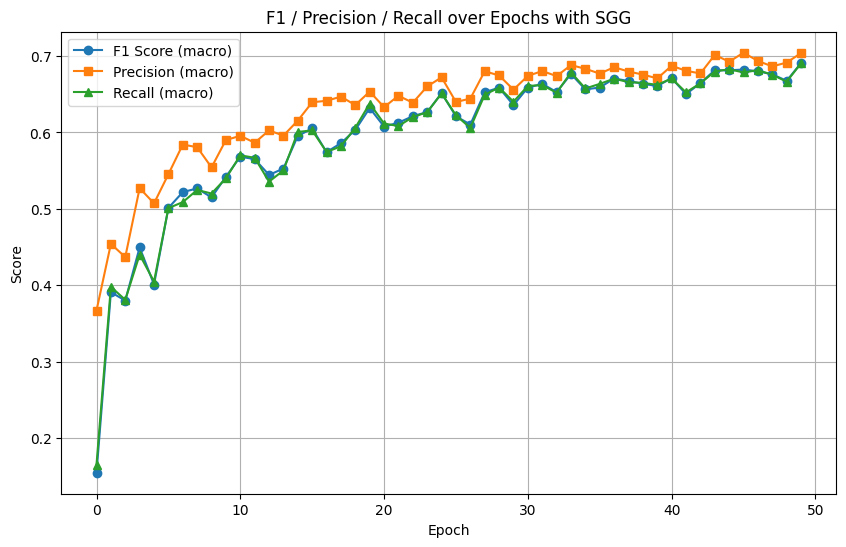

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(metrics1_callback.f1_scores, label='F1 Score (macro)', marker='o')
plt.plot(metrics1_callback.precision_scores, label='Precision (macro)', marker='s')
plt.plot(metrics1_callback.recall_scores, label='Recall (macro)', marker='^')
plt.title('F1 / Precision / Recall over Epochs with SGG')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Training Set 1
MyCNN_2_model2_F1 = MyCNN_2()
MyCNN_2_model2_F1.compile(
    optimizer='Adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

metrics2_callback = MetricsCallback(validation_data=(x_val, y_val_to20))

MyCNN_2_results2_F1 = MyCNN_2_model2_F1.fit(
    x_train, y_train_to20, epochs=50, batch_size=10, validation_data=(x_val, y_val_to20), callbacks=[metrics2_callback]
)

Epoch 1/50
849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1522 - loss: 3.5517
Epoch 1 — F1: 0.3081, Precision: 0.3337, Recall: 0.3368
850/850 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.1523 - loss: 3.5508 - val_accuracy: 0.3273 - val_loss: 2.3467
Epoch 2/50
845/850 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2904 - loss: 2.5167
Epoch 2 — F1: 0.3794, Precision: 0.4036, Recall: 0.3874
850/850 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.2905 - loss: 2.5161 - val_accuracy: 0.3833 - val_loss: 1.9663
Epoch 3/50
847/850 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3500 - loss: 2.1625
Epoch 3 — F1: 0.4375, Precision: 0.4636, Recall: 0.4494
850/850 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3500 - loss: 2.1623 - val_accuracy: 0.4500 - val_loss: 1.8290
Epoch 4/50
838/850 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4097 - loss: 1.9524
Epoch 4 — F1: 0.4283, Precision: 0.5073, Recall: 0.4209
850/850 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4097 - loss: 1.9524 - va

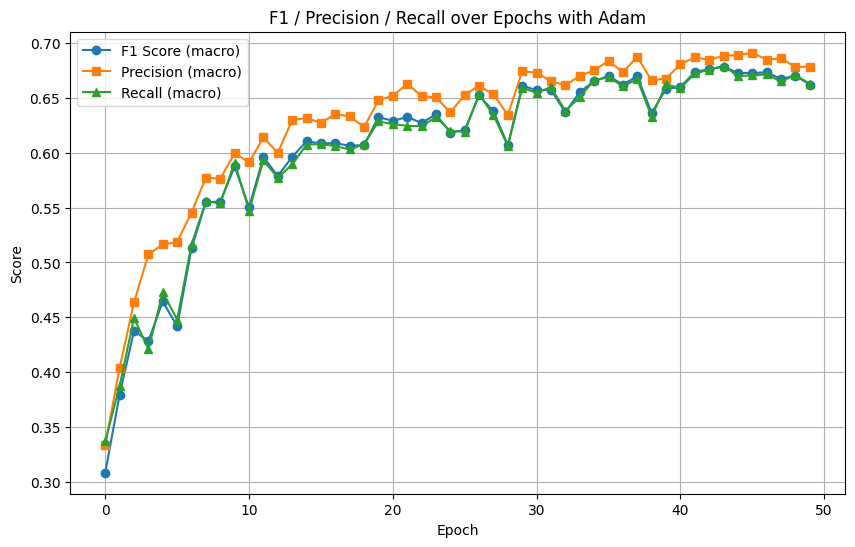

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(metrics2_callback.f1_scores, label='F1 Score (macro)', marker='o')
plt.plot(metrics2_callback.precision_scores, label='Precision (macro)', marker='s')
plt.plot(metrics2_callback.recall_scores, label='Recall (macro)', marker='^')
plt.title('F1 / Precision / Recall over Epochs with Adam')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


**Plot the Results with accuracy as metric**

In [ ]:
def plot_accuracy(history, model_name):
  '''
  Parameters:
  :params history: keras history object returned by model.fit()
  :params model_name: the name for the plot title
  '''

  acc = history.history.get('accuracy')
  val_acc = history.history.get('val_accuracy')

  if acc is None or val_acc is None:
    print("Error: 'accuracy' or 'val_accuracy' not found in history.")
    return

  plt.figure(figsize=(10, 6))
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.title(f'{model_name} Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

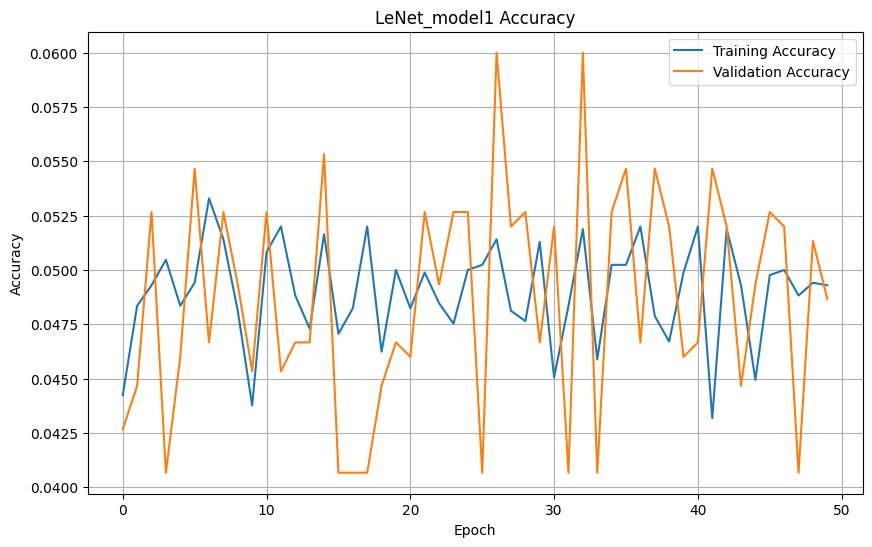

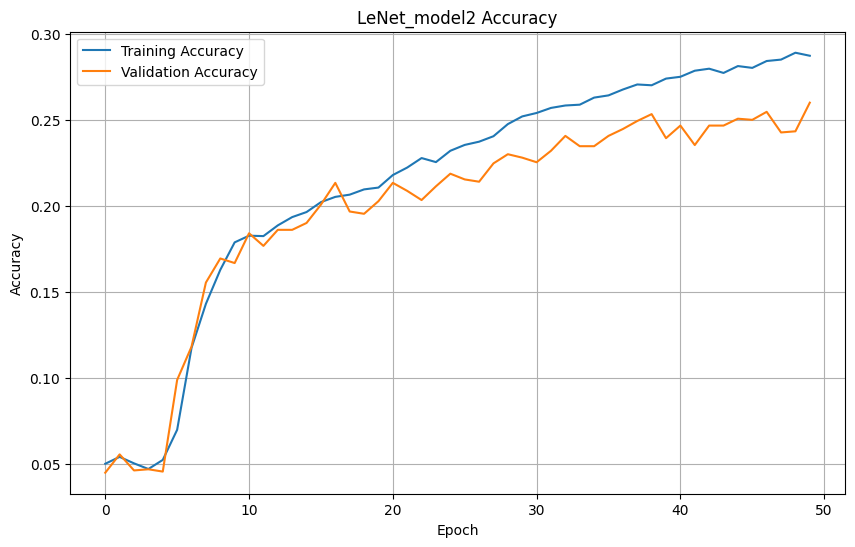

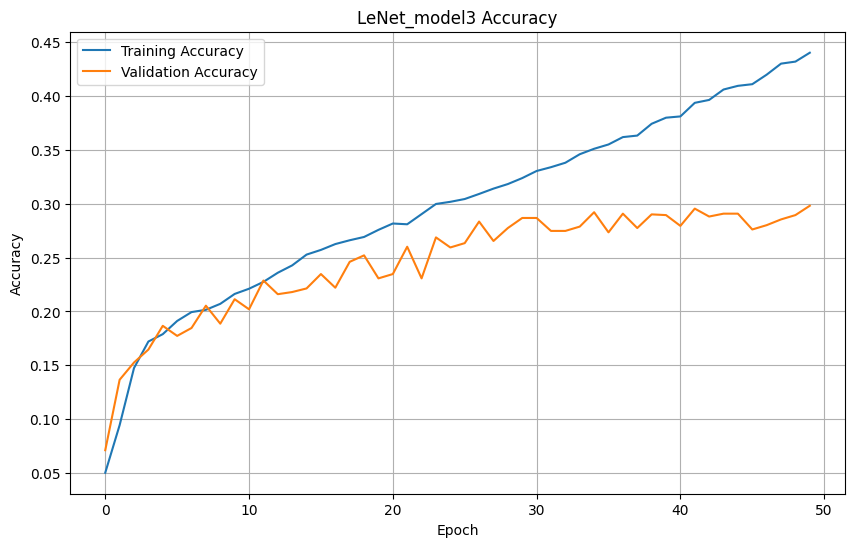

In [ ]:
# For LeNet
plot_accuracy(LeNet_results1, model_name="LeNet_model1") # SGD
plot_accuracy(LeNet_results2, model_name="LeNet_model2") # Nadam
plot_accuracy(LeNet_results3, model_name="LeNet_model3") # RMSprop

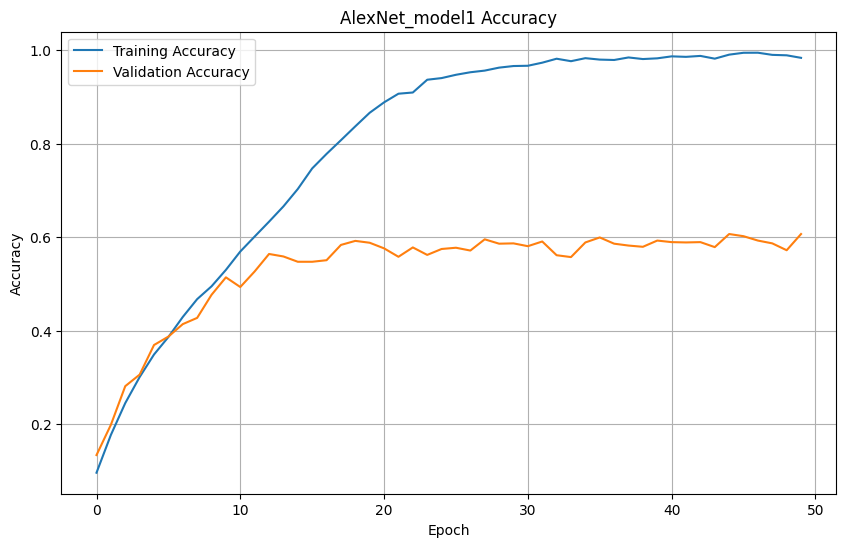

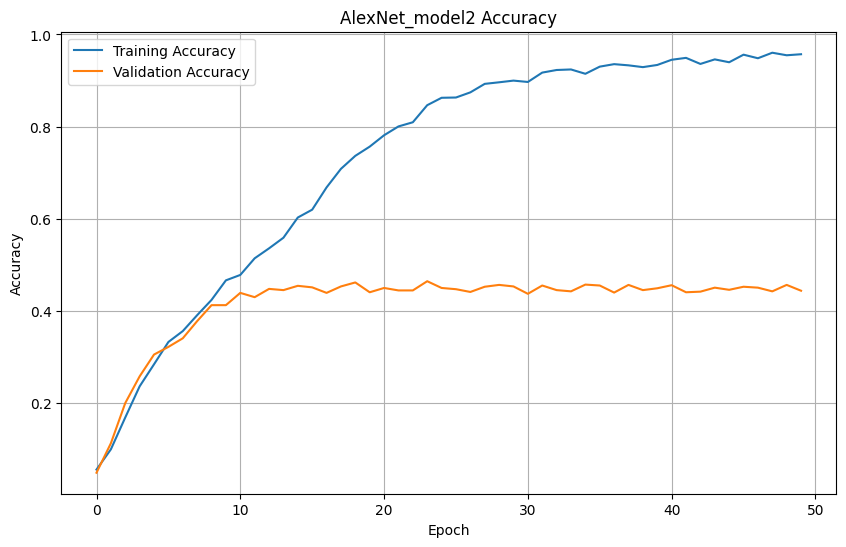

In [ ]:
# For AlexNet
plot_accuracy(AlexNet_results1, model_name="AlexNet_model1") # SGD
plot_accuracy(AlexNet_results2, model_name="AlexNet_model2") # Adam

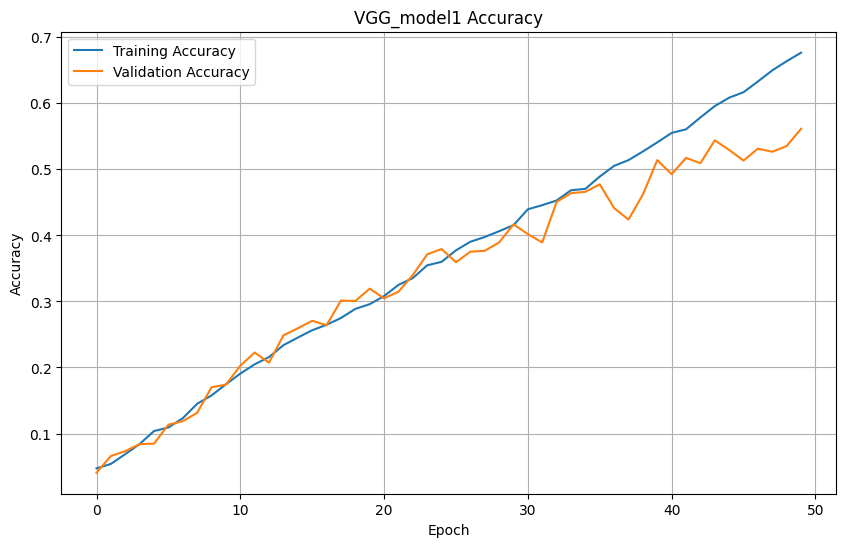

In [ ]:
# For VGG
plot_accuracy(VGG_results1, model_name="VGG_model1") # SGD

In [ ]:
plot_accuracy(VGG_results2, model_name="VGG_model2") # Adam

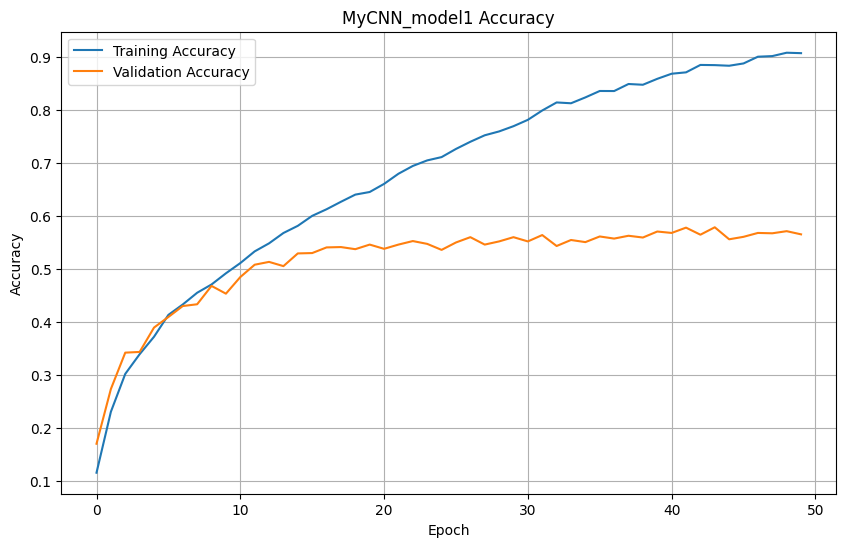

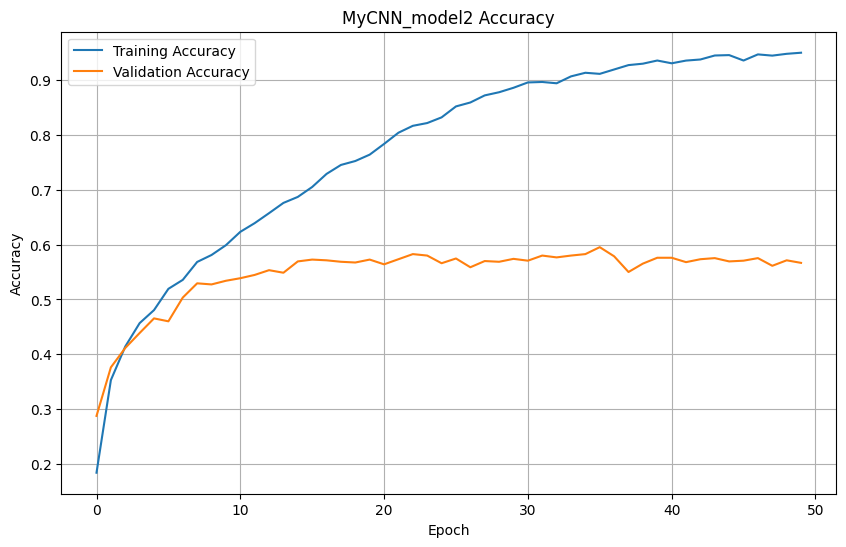

In [ ]:
# For MyCNN
plot_accuracy(MyCNN_results1, model_name="MyCNN_model1") # SGD
plot_accuracy(MyCNN_results2, model_name="MyCNN_model2") # Adam

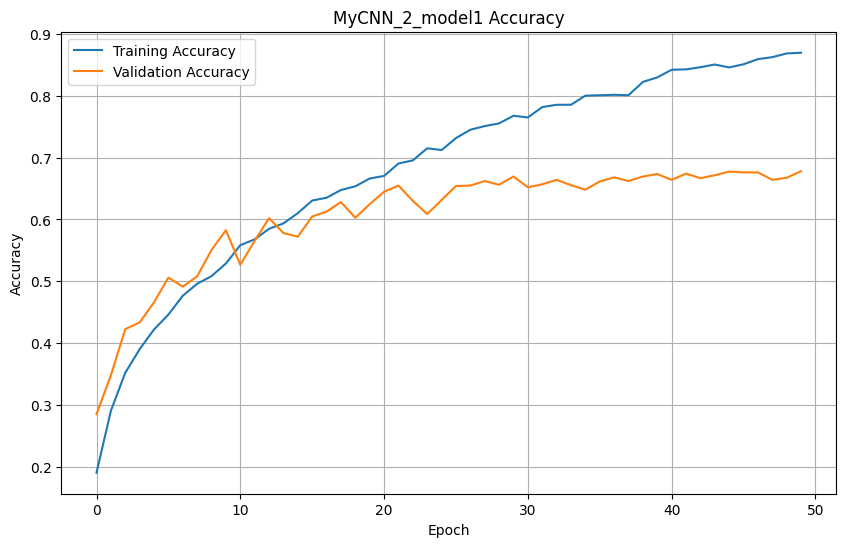

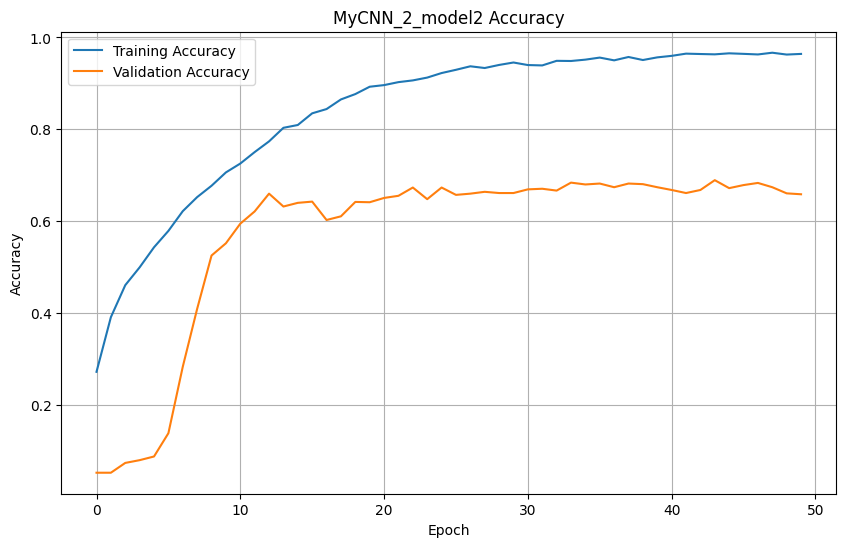

In [ ]:
# For MyCNN_2
plot_accuracy(MyCNN_2_results1, model_name="MyCNN_2_model1") # SGD
plot_accuracy(MyCNN_2_results2, model_name="MyCNN_2_model2") # Adam

**Σχολιασμός Αποτελεσμάτων:**

Εκτελέσαμε έναν αριθμό από trainings/validations για τα 4 διαφορετικά μοντέλα που υλοποιήσαμε και συγκεκριμένα, για το κάθε μοντέλο πειραματιστήκαμε με διαφορετικούς αλγορίθμους βελτιστοποίησης (*optimizers*), και διαφορετικό *batch size* κρατώντας την ίδια αντιστοιχία για κάθε μοντέλο.

*Τα Plot που κάναμε αφορούν μόνο την εκπαίδευση με GPUs.*

Για το **LeNet** πραγματοποιήσαμε 5 training/validation για 50 εποχές το καθένα. Τα πρώτα δυο έγιναν με χρήση CPU, κάτι που χρειάστηκε πάρα πολύ χρόνο για να τερματίσουν. Τα υπόλοιπα 3 έγιναν με χρήση της T4 GPU σε πολύ λιγότερο χρόνο. Χρησιμοποιήσαμε τους εξείς *optimizers*:
  - SGD (Stochastic Gradient Descent)
  - Nadam (Nesterov-accelerated Adaptive Moment Estimation)
  - RMSprop (Root Mean Square Propagation)

Ο μεν πρώτος *(SGD)* ενημερώνει τα βάρη με βάση το αρνητικό της παραγώγου (κλίσης) του σφάλματος για κάθε batch (ομάδα δειγμάτων). Ο δεύτερος*(Nadam)* είναι ένας συνδυασμός των Adam Και Nesterov momentum, και χρησιμοποιεί προσαρμοστικό leraning rate όπως ο Adam ενσωματώνοντας momentum estimation, προβλέποντας προς τα πού πηγαίνει το βάρος και διορθώνοντας νωρίτερα. Ο δε τρίτος *(RMSprop)* προσαρμόζει το learning rate ξεχωριστά για κάθε βάρος, βασισμένο στο μέσο όρο των πρόσφατων τιμών των παραγώγων.

Επιπλέον, η εκπαίδευση με SGD και RMSprop έγινε με batch size ίσο με 10, ενώ για το Nadam ίσο με 128. Το **batch size** δηλώνει τον αριθμό των δειγμάτων που θα επεξεργαστεί το μοντέλο προτού ανανεώσει τα βάρη. Μεγάλο batch size συνεπάγεται μικρότερες ανανεώσεις βαρών ανά εποχή. **Όπως παρατηρήσαμε, μικρότερο batch size μας έδωσε καλύτερα αποτελέσματα γενικά**.

Καλύτερο αποτέλεσμα πήραμε με το RMSprop *(accuracy: 0.4467 | val_accuracy: 0.2980)*, ενώ με τον SGD φάνηκε να δίνει πολύ άσχημα αποτελέσματα *(accuracy: 0.0483 | val_accuracy: 0.0487)*.

Για τα επόμενα τρία μοντέλα χρησιμοποιήσαμε τους *optimizers*:
  - Adam
  - SGD

Για το **AlexNet** πραγματοποιήσαμε 2 training/validation για 50 εποχές το καθένα (μόνο με χρήση T4 GPU). Αυτό που παρατηρήσαμε ήταν ότι αρχικά, για τις πρώτες εποχές το *validation accuracy* αυξανόταν σχεδόν όσο και το *accuracy*. Ωστόσο, ενώ το *accuracy* κατέληγε πολύ κοντά στο 1 (100%), το *val accuracy* έφτανε την τιμή 0.6067 (με τον SGD και batch size=10), ενώ 0.4433 (με τον Adam και batch size=128). Προέκυψε, δηλαδή, κάτι σαν υπερπροσαρμογή στα δεδομένα εκπαίδευσης.

Για το **VGG** πραγματοποιήσαμε 1 training/validation (λόγω περιορισμένων πόρων) για 50 εποχές το καθένα (μόνο με χρήση T4 GPU). Αυτό που παρατηρήσαμε ήταν ότι αρχικά, για τις πρώτες εποχές (περισσότερες από αυτές του AlexNet), το validation accuracy αυξανόταν σχεδόν όσο και το accuracy. Στην τελευταία επανάληψη (εποχή=50), το *accuracy* κατέληγε στην τιμή 0.6820, ενώ το *val_accuracy* κατέληγε στην τιμή 0.5613 (με τον SGD και batch size=10).

Σύγκριση **MyCNN** και **MyCNN_2**: <br>
Τα δυο αυτά μοντέλα προσπάθησαν να ενσωματώσουν τα καλύτερα χαρακτηριστικά των τριών προηγούμενων, και συγκεκριμένα το MyCNN_2 αποτελεί βελτίωση του MyCNN που υλοποίησα πρώτο, και για αυτό τον λόγο μας δίνει καλύτερα αποτελέσματα. Το νεότερο CNN επιτυγχάνει πιο βαθιά και ισχυρή επεξεργασία των χαρακτηριστικών σε κάθε Block (2 Conv layers αντί για 1), καλύτερη γενίκευση λόγω των dropout και του batch normalization και πιο σταθερή εκπαίδευση με λιγότερο overfitting.

**ΣΥΝΟΨΙΖΟΝΤΑΣ:**

**Επίδραση του αριθμού δεδομένων στην απόδοση του μοντέλου:** <br>
Είναι γνωστό ότι όσο περισσότερα δεδομένα υπάρχουν για την εκπαίδευση ενός νευρωνικού δικτύου, τόσο καλύτερα αποτελέσματα επιστρέφει καθώς εκπαιδεύεται σε ένα μεγαλύτερο πλήθος από features και αποφεύγει καλύτερα το overfitting.

**Επίδραση του αλγορίθμου βελτιστοποίησης:** <br>
Ο αλγόριθμος βελτιστοιποίησης παίζει πολύ σημαντικό ρόλο στην απόδοση του μοντέλου, όπως ακριβώς είδαμε με την αποτυχία του SGD στο LeNet. Η επιλογή του καταλληλότερου ποικίλει ανάλογα το νευρωνικό δίκτυο, και δεν είναι δεδομένη. Σε εμάς, μετά από δοκιμές καταλήξαμε στο καλύτερο μοντέλο μας να έχει σαν αλγόριθμο βελτιστοποίησης τον SGD.

**Επίδραση του μεγέθους παρτίδας (batch size):** <br>
Ύστερα από δοκιμές που πραγματοποιήσαμε, μικρότερο batch size φάνηκε να δίνει καλύτερα αποτελέσματα. Βέβαια, το trade-off που προέκυψε με το μικρό batch size, και συνεπώς την συχνότερη ανανέωση των βαρών, ήταν η αύξηση του χρόνου εκπαίδευσης.

Το χειρότερο μοντέλο αποδείχθηκε να είναι το **LeNet** όπως άλλωστε περιμέναμε, καθώς υλοποιήθηκε αρκετά παλαιότερα από τα άλλα 2 (χωρίς να λαμβάνουμε υπόψιν το δικό μας), τότε που δεν υπήρχαν ούτε οι υπολογιστικοί πόροι ούτε μεγάλα datasets.

Το καλύτερο μοντέλο εκ των τριών που διαβάσαμε στα papers αποδείχθηκε να είναι το **AlexNet**, το οποίο είναι αρκετά μεγαλύτερο του LeNet. Το **VGG** δεν απέχει πολύ από το AlexNet σε accuracy. Το VGG άλλωστε βασίστηκε πολύ στην μορφή που έχει το AlexNet και εξελίχθηκε σε βαθύτερο δίκτυο.

Συνολικά το καλύτερο μοντέλο είναι το **MYCNN_2** με *val accuracy: 0.6780* (με SGD).

**Σχετικά με το F1 Score:**

Το Precision πρακτικά απαντάει το ερώτημα: " *Από όσες φορές το μοντέλο είπε ναι, πόσες φορές είχε δίκιο;* "

Το Recall πρακτικά απαντάει το ερώτημα: " *Από όλες τις πραγματικές θετικές περιπτώσεις, πόσες βρήκε το μοντέλο;* "

Το F1 Score είναι αυτό τελικά που απαντάει το ερώτημα: " *Πόσο καλά ισορροπεί το Precision και το Recall;* "


## Ερώτημα 2
---
### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), ώστε το μοντέλο σας να γενικεύει καλύτερα, όπως:

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator))

---
### Βήμα 2: Αξιολόγηση
Αξιολογήστε τα αποτελέσματά σας, βάσει του F1 score για το σύνολο επικύρωσης και για το σύνολο ελέγχου

---


**Απάντηση:**

  - **Dropout**

Η τεχνική **Dropout** έχει ήδη εφαρμοστεί στο μοντέλο μας και αποτελεί μια μέθοδο regularization (κανονικοποίησης) που χρησιμοποιείται για την αποφυγή της υπερεκπαίδευσης (overfitting). Κατά την διάρκεια της εκπαίδευσης αυτό που κάνει είναι να 'απενεργοποιεί' τυχαία ένα ποσοστό των νευρώνων σε κάθε forward pass, έτσι ώστε το δίκτυο να μην εξαρτάται από ορισμένους μόνο νευρώνες. Έτσι εξαναγκάζει το δίκτυο να μαθαίνει πιο γενικευμένα χαρακτηριστικά. Το dropout λαμβάνει χώρα μόνο κατά την εκπαίδευση του μοντέλου, ενώ κατά την αξιολόγηση/πρόβλεψη όλοι οι νευρώνες είναι ενεργοί.

  - **Data Augmentation**

Ακολουθεί η εφαρμογή της τεχνικής **Data augmentation** η οποία συμβάλει στην δημιουργία νέων, ελαφρώς τροποποιημένων δειγμάτων από τα υπάρχοντα δεδομένα, χωρίς να χρειάζεται να συλλέξει νέα. Και αυτή η τεχνική αποτρέπει την υπερπροσαρμογή του μοντέλου, καθώς αυτό ΔΕΝ 'απομνημονεύει' τα δεδομένα, αλλά μαθαίνει να γενικεύει. Το μοντέλο γίνεται λιγότερο ευαίσθητο σε μικρές αλλαγές κλίμακας, περιστροφής κλπ, και τέλος, το μοντέλο μας προπονείται με μεγαλύτερο αριθμό δεδομένων χωρίς νέα συλλογή (η αύξηση αφείλεται καθαρά στα υπάρχοντα δείγματα που έχουν υποστεί ελαφρές μετατοπίσεις κλπ).

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(32, 32, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
def MyCNN_2_DropoutAndDaraAugm():
    model = models.Sequential([
        data_augmentation,

        # Block 1
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=2),
        layers.Dropout(0.25),

        # Block 2
        layers.Conv2D(128, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=2),
        layers.Dropout(0.25),

        # Block 3
        layers.Conv2D(256, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=2),
        layers.Dropout(0.4),

        # Fully Connected
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(20)  # Output layer (no softmax if using from_logits=True)
    ])
    return model


In [ ]:
model = MyCNN_2_DropoutAndDaraAugm()
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

metrics_callback = MetricsCallback(validation_data=(x_val, y_val_to20))

history = model.fit(
    x_train, y_train_to20, epochs=50, batch_size=10, validation_data=(x_val, y_val_to20), callbacks=[metrics_callback]
    )

Epoch 1/50
849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1476 - loss: 3.5566
Epoch 1 — F1: 0.2816, Precision: 0.3482, Recall: 0.2884
850/850 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.1477 - loss: 3.5558 - val_accuracy: 0.2853 - val_loss: 2.4013
Epoch 2/50
847/850 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2578 - loss: 2.6412
Epoch 2 — F1: 0.3516, Precision: 0.3637, Recall: 0.3694
850/850 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.2578 - loss: 2.6410 - val_accuracy: 0.3640 - val_loss: 2.1083
Epoch 3/50
849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2802 - loss: 2.4193
Epoch 3 — F1: 0.3661, Precision: 0.4232, Recall: 0.3782
850/850 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.2803 - loss: 2.4192 - val_accuracy: 0.3733 - val_loss: 1.9830
Epoch 4/50
846/850 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3257 - loss: 2.2702
Epoch 4 — F1: 0.3769, Precision: 0.4320, Recall: 0.3773
850/850 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3257 - loss: 2.27

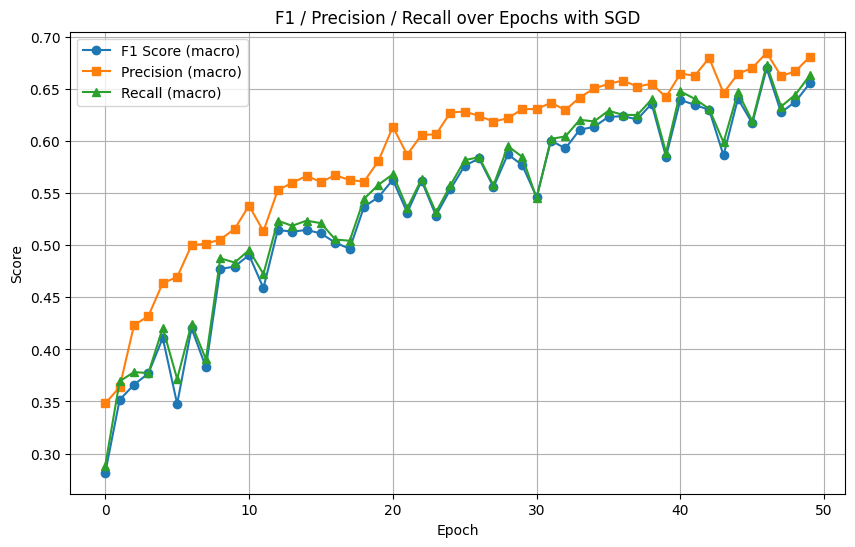

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(metrics_callback.f1_scores, label='F1 Score (macro)', marker='o')
plt.plot(metrics_callback.precision_scores, label='Precision (macro)', marker='s')
plt.plot(metrics_callback.recall_scores, label='Recall (macro)', marker='^')
plt.title('F1 / Precision / Recall over Epochs with SGD')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

**ΣΧΟΛΙΑΣΜΟΣ ΑΠΟΤΕΛΕΣΜΑΤΩΝ**

Ήδη από πριν είχαμε δει ότι με εφαρμογή πιο προσεγμένου *dropout* το δίκτυό μας, *MyCNN_2*, παρείχε καλύτερα αποτελέσματα από το *MyCNN*, το οποίο είχε μοναδικό dropout πριν την έξοδο. Αυτό γιατί το dropout είναι μια τεχνική ομαλοποίησης, *όπως έχουμε ήδη αναφέρει παραπάνω*, η οποί συμβάλει στην αποφυγή της υπερπροσαρμογής.

Με επιπλέον προσθήκη της τεχνικής *data augmentation* δεν έχουμε αισθητή βελτίωση, κάτι που κανονικά δεν θα έπρεπε να συμβαίνει. Αυτό μπορεί να οφείλεται στο γεγονός ότι έχουμε ήδη ένα μικρό μέρος του dataset για να εκπαιδεύσουμε το μοντέλο με αποτέλεσμα τροποποίηση στα δεδομένα μέσω data augmentation να μην συμβάλει ικανοποιητικά στην βελτίωση της εκπαίδευσης. Επιπλέον, ενδέχεται οι παραμορφώσεις που επιλέξαμε να κάνουμε να μην ήταν ικανοποιητικές για το μοντέλο και να παραποίησαν αρκούντως πολύ τα δεδομένα ώστε στην ουσία να μην συμβάλλουν θετικά στην εκπαίδευση. Το F1 Score ωστόσο παραμένει αρκετά ψηλά, ίσο με *0.6554*, αντί για *0.6909* που είχαμε με απλό dropout ενσωματωμένο μόνο. Και τα δυο υπερνικούν το αρχικό μας μοντέλο χωρίς dropout και data augmentation.

**Πειραματισμός με επιπλέον διαφορετικές τεχνικές για την αποφυγή overfitting**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',        # Check the validation loss
    patience=7,                # Wait 7 epochs before terminating
    restore_best_weights=True  # Restore best weights so far
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,              # Reduce learning rate to the half
    patience=3,              # If not better results for 3 epochs
    min_lr=1e-6              # Minimum
)


In [ ]:
model2 = MyCNN_2_DropoutAndDaraAugm()
model2.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

metrics2_callback = MetricsCallback(validation_data=(x_val, y_val_to20))

history2 = model2.fit(
    x_train, y_train_to20, epochs=50, batch_size=10, validation_data=(x_val, y_val_to20), callbacks=[metrics2_callback]
    )

Epoch 1/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1374 - loss: 3.5678
Epoch 1 — F1: 0.1589, Precision: 0.2782, Recall: 0.1809
850/850 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.1374 - loss: 3.5674 - val_accuracy: 0.1820 - val_loss: 2.8232
Epoch 2/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2302 - loss: 2.7159
Epoch 2 — F1: 0.3444, Precision: 0.3738, Recall: 0.3477
850/850 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.2303 - loss: 2.7158 - val_accuracy: 0.3427 - val_loss: 2.1523
Epoch 3/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2753 - loss: 2.4543
Epoch 3 — F1: 0.3414, Precision: 0.4347, Recall: 0.3494
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.2753 - loss: 2.4542 - val_accuracy: 0.3447 - val_loss: 2.3261
Epoch 4/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3228 - loss: 2.2430
Epoch 4 — F1: 0.3946, Precision: 0.4483, Recall: 0.3996
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.3228 - loss: 2.2430

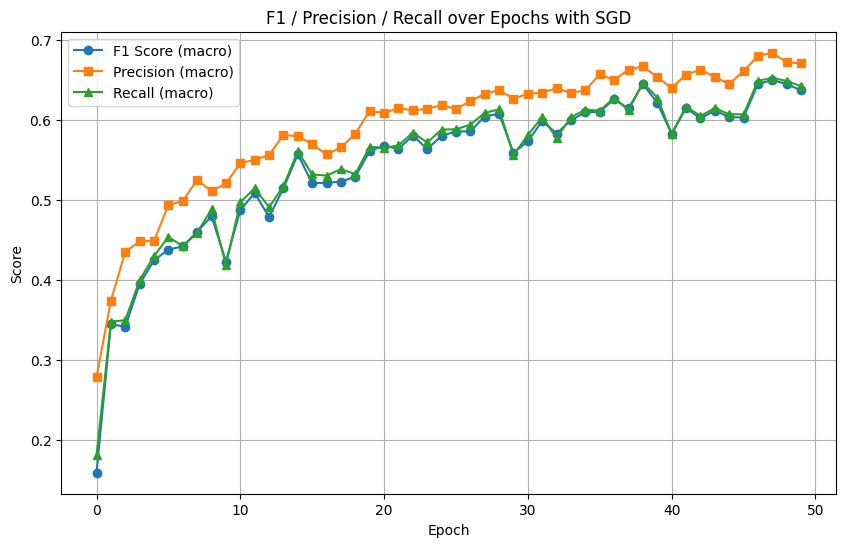

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(metrics2_callback.f1_scores, label='F1 Score (macro)', marker='o')
plt.plot(metrics2_callback.precision_scores, label='Precision (macro)', marker='s')
plt.plot(metrics2_callback.recall_scores, label='Recall (macro)', marker='^')
plt.title('F1 / Precision / Recall over Epochs with SGD')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

**ΣΧΟΛΙΑΣΜΟΣ ΑΠΟΤΕΛΕΣΜΑΤΩΝ:**

Εδώ πειραματιστήκαμε και με δυο επιπλέον τενικές βελτιστοποίησης, την **Early Stopping** και την **Reduce Learning Rate**.

Η πρώτη είναι μια τεχνική τακτικής διακοπής της εκπαίδευσης ενός νευρωνικού δικτύου όταν η απόδοση στο validation set σταματά να βελτιώνεται. Στόχος της είναι να προλάβουμε το overfitting, δηλαδή να μην συνεχίσει η εκπαίδευση αφού το μοντέλο έχει ήδη φτάσει το καλύτερο σημείο σε απόδοση στο validation set. Έτσι εξοικονομούμε τόσο χρόνο εκπαίδευσης, συμβάλλοντας ταυτόχρονα στην βελτίωση της γενίκευσης του μοντέλου σε νέα δεδομένα (που δεν έχει προλάβει να δει λόγω early stopping).

Η δεύτερη εφαρμόζεται κατά την διάρκεια εκπαίδευσης ενός νευρωνικού δικτύου, και χρησιμοποιείται γι ανα βοηθήσει το μοντέλο να συγκλίνει πιο αποτελεσματικά ειδικά όταν η εκπαίδευση 'κολλάει' ή το validation accuracy δεν βελτιώνεται. Αυτό που κάνει ουσιαστικά είναι να μειώνει το learning rate του optimizer, όταν η απόδοση στο validation set σταματάει να βελτιώνεται.

Αυτό που **παρατηρήσαμε** είναι ότι δεν πέφτει ποτέ σε early stop κάτι που έχει να κάνει με τις παραμέτρους που έχουμε ορίσει και το threshold που το αφήνουμε να έχει προτού αποφασίσει ότι δεν έχουμε άλλη βελτίωση άρα τερμάτισε. Στην εποχή 50 το F1 Score καταλήγει να είναι *0.6367*, χωρίς σημαντική βελτίωση από προηγουμένως.

## Ερώτημα 3
---
### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς το F1 score στην αντιμετώπιση της υπερεκπαίδεσης.

Για το transfer learning, επιλέξτε το [VGG19](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19)  και το [EfficientNetB0](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0) για μεταφορά μάθησης.

α. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

β. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

---
### Βήμα 2: Αξιολόγηση

Αξιολογήστε τα αποτελέσματά σας, βάσει του F1 score για το σύνολο επικύρωσης και για το σύνολο ελέγχου.

---

**Απάντηση:** Το μοντέλο που θα χρησιμοποιήσουμε δεν περιέχει τις τεχνικές *Early Stopping* και *Reduce Learning Rate*.

- Βήμα 1

In [ ]:
# Pre-trained models
pretrained_model_VGG = tf.keras.applications.VGG19(input_shape=(224,224,3), include_top=False)
pretrained_model_EfficientNet = tf.keras.applications.efficientnet.EfficientNetB0(input_shape=(224,224,3), include_top=False)
pretrained_model_VGG.trainable = False
pretrained_model_EfficientNet.trainable=False

In [ ]:
# Create a MyCNN_2 model variant using the pre-trained model as a base
def MyCNN_with_transfer_learning(pretrained_model):
  base_model = pretrained_model

  # Freeze the convolutional base
  base_model.trainable = False

  model = models.Sequential([
      base_model, # The pre-trained convolutional base

      # Fully Connected
      layers.Flatten(),
      layers.Dense(512, activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(20)
  ])
  return model

In [ ]:
print("Layer Output Shapes:")
forVGG19 = tf.random.uniform((1, 224, 224, 3))
for layer in MyCNN_with_transfer_learning(pretrained_model_VGG).layers:
  forVGG19 = layer(forVGG19)
  print(f"{layer.__class__.__name__:<20} output shape:\t{forVGG19.shape}")

Layer Output Shapes:
Functional           output shape:	(1, 7, 7, 512)
Flatten              output shape:	(1, 25088)
Dense                output shape:	(1, 512)
BatchNormalization   output shape:	(1, 512)
Dropout              output shape:	(1, 512)
Dense                output shape:	(1, 20)


In [ ]:
print("Layer Output Shapes:")
forEfficientNteB0 = tf.random.uniform((1, 224, 224, 3))
for layer in MyCNN_with_transfer_learning(pretrained_model_EfficientNet).layers:
  forEfficientNteB0 = layer(forEfficientNteB0)
  print(f"{layer.__class__.__name__:<20} output shape:\t{forEfficientNteB0.shape}")

Layer Output Shapes:
Functional           output shape:	(1, 7, 7, 1280)
Flatten              output shape:	(1, 62720)
Dense                output shape:	(1, 512)
BatchNormalization   output shape:	(1, 512)
Dropout              output shape:	(1, 512)
Dense                output shape:	(1, 20)


In [ ]:
# Compile using the VGG19 (32x32x3 input images)
model_part3_vgg19 = MyCNN_with_transfer_learning(pretrained_model_VGG)
model_part3_vgg19.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

metrics_part3_vgg19_callback = MetricsCallback(validation_data=(x_val, y_val_to20))

history_part3 = model_part3_vgg19.fit(
    x_train, y_train_to20, epochs=50, batch_size=10, validation_data=(x_val, y_val_to20), callbacks=[metrics_part3_vgg19_callback]
    )

Epoch 1/50
846/850 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2755 - loss: 2.6152
Epoch 1 — F1: 0.4236, Precision: 0.4400, Recall: 0.4331
850/850 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.2758 - loss: 2.6136 - val_accuracy: 0.4300 - val_loss: 1.9126
Epoch 2/50
849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4024 - loss: 1.9809
Epoch 2 — F1: 0.4399, Precision: 0.4527, Recall: 0.4509
850/850 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4024 - loss: 1.9808 - val_accuracy: 0.4487 - val_loss: 1.8145
Epoch 3/50
844/850 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4469 - loss: 1.8047
Epoch 3 — F1: 0.4564, Precision: 0.4682, Recall: 0.4702
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4469 - loss: 1.8050 - val_accuracy: 0.4667 - val_loss: 1.7739
Epoch 4/50
845/850 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4480 - loss: 1.7928
Epoch 4 — F1: 0.4606, Precision: 0.4676, Recall: 0.4726
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4480 - loss: 1.7927 - 

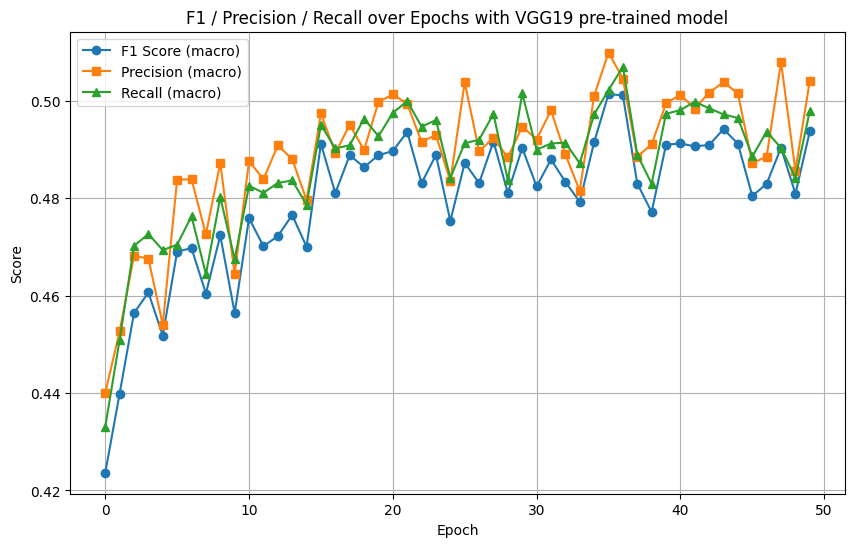

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(metrics_part3_vgg19_callback.f1_scores, label='F1 Score (macro)', marker='o')
plt.plot(metrics_part3_vgg19_callback.precision_scores, label='Precision (macro)', marker='s')
plt.plot(metrics_part3_vgg19_callback.recall_scores, label='Recall (macro)', marker='^')
plt.title('F1 / Precision / Recall over Epochs with VGG19 pre-trained model')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Compile using the VGG19
model_part3_vgg19 = MyCNN_with_transfer_learning(pretrained_model_VGG)
model_part3_vgg19.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

metrics_part3_vgg19_callback = MetricsCallback(validation_data=(x_val_resized, y_val_to20))

history_part3 = model_part3_vgg19.fit(
    x_train_resized, y_train_to20, epochs=15, batch_size=10, validation_data=(x_val_resized, y_val_to20), callbacks=[metrics_part3_vgg19_callback]
    )

Epoch 1/15
850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.3534 - loss: 2.2567
Epoch 1 — F1: 0.3583, Precision: 0.5894, Recall: 0.3982
850/850 ━━━━━━━━━━━━━━━━━━━━ 126s 145ms/step - accuracy: 0.3534 - loss: 2.2564 - val_accuracy: 0.3987 - val_loss: 2.4530
Epoch 2/15


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5599 - loss: 1.4333
Epoch 2 — F1: 0.5489, Precision: 0.6257, Recall: 0.5403
850/850 ━━━━━━━━━━━━━━━━━━━━ 117s 117ms/step - accuracy: 0.5599 - loss: 1.4334 - val_accuracy: 0.5433 - val_loss: 1.5087
Epoch 3/15
850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5994 - loss: 1.2640
Epoch 3 — F1: 0.5023, Precision: 0.6309, Recall: 0.5062
850/850 ━━━━━━━━━━━━━━━━━━━━ 142s 117ms/step - accuracy: 0.5994 - loss: 1.2640 - val_accuracy: 0.5047 - val_loss: 1.7150
Epoch 4/15
850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6638 - loss: 1.0785
Epoch 4 — F1: 0.5627, Precision: 0.6430, Recall: 0.5761
850/850 ━━━━━━━━━━━━━━━━━━━━ 142s 117ms/step - accuracy: 0.6638 - loss: 1.0785 - val_accuracy: 0.5820 - val_loss: 1.4783
Epoch 5/15
850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6950 - loss: 0.9905
Epoch 5 — F1: 0.5502, Precision: 0.6157, Recall: 0.5622
850/850 ━━━━━━━━━━━━━━━━━━━━ 143s 118ms/step - accuracy: 0.6950 - loss: 0.99

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8063 - loss: 0.6145
Epoch 11 — F1: 0.5370, Precision: 0.6263, Recall: 0.5413
850/850 ━━━━━━━━━━━━━━━━━━━━ 133s 107ms/step - accuracy: 0.8063 - loss: 0.6146 - val_accuracy: 0.5393 - val_loss: 1.8375
Epoch 12/15
850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8033 - loss: 0.6034
Epoch 12 — F1: 0.5752, Precision: 0.6297, Recall: 0.5762
850/850 ━━━━━━━━━━━━━━━━━━━━ 151s 117ms/step - accuracy: 0.8033 - loss: 0.6034 - val_accuracy: 0.5760 - val_loss: 1.6479
Epoch 13/15
850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8241 - loss: 0.5400
Epoch 13 — F1: 0.5619, Precision: 0.6419, Recall: 0.5617
850/850 ━━━━━━━━━━━━━━━━━━━━ 142s 117ms/step - accuracy: 0.8240 - loss: 0.5400 - val_accuracy: 0.5653 - val_loss: 1.7477
Epoch 14/15
850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8348 - loss: 0.5135
Epoch 14 — F1: 0.5550, Precision: 0.6255, Recall: 0.5654
850/850 ━━━━━━━━━━━━━━━━━━━━ 91s 107ms/step - accuracy: 0.8348 - loss

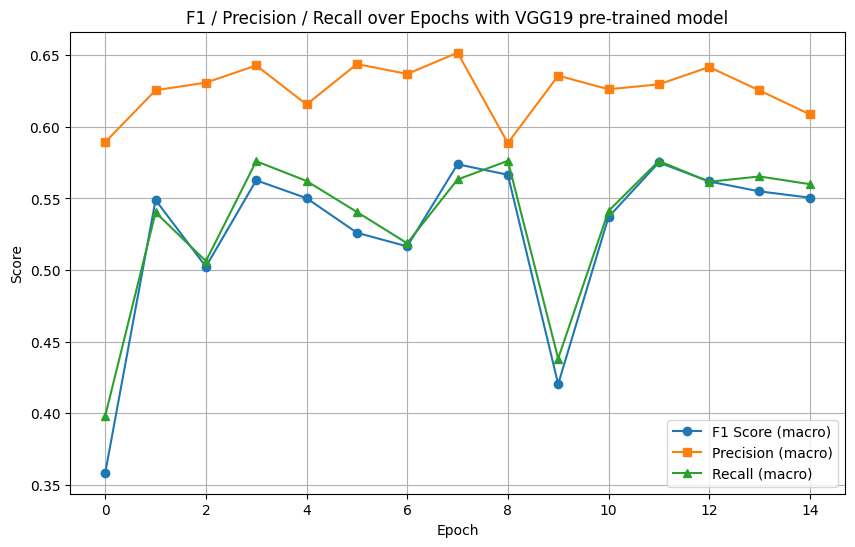

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(metrics_part3_vgg19_callback.f1_scores, label='F1 Score (macro)', marker='o')
plt.plot(metrics_part3_vgg19_callback.precision_scores, label='Precision (macro)', marker='s')
plt.plot(metrics_part3_vgg19_callback.recall_scores, label='Recall (macro)', marker='^')
plt.title('F1 / Precision / Recall over Epochs with VGG19 pre-trained model')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Compile using the EfficientNetB0
model_part3_EfficientNetB0 = MyCNN_with_transfer_learning(pretrained_model_EfficientNet)
model_part3_EfficientNetB0.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

metrics_part3_EfficientNetB0_callback = MetricsCallback(validation_data=(x_val_resized, y_val_to20))

history_part3 = model_part3_EfficientNetB0.fit(
    x_train_resized, y_train_to20, epochs=15, batch_size=10, validation_data=(x_val_resized, y_val_to20), callbacks=[metrics_part3_EfficientNetB0_callback]
    )


Epoch 1/15
849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0551 - loss: 3.3448
Epoch 1 — F1: 0.0046, Precision: 0.0024, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 88s 78ms/step - accuracy: 0.0551 - loss: 3.3447 - val_accuracy: 0.0487 - val_loss: 3.0345
Epoch 2/15
  5/850 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.0493 - loss: 3.1569

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0510 - loss: 3.1801
Epoch 2 — F1: 0.0054, Precision: 0.0029, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.0510 - loss: 3.1800 - val_accuracy: 0.0573 - val_loss: 3.5683
Epoch 3/15


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


848/850 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0492 - loss: 3.1245
Epoch 3 — F1: 0.0045, Precision: 0.0023, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.0492 - loss: 3.1245 - val_accuracy: 0.0467 - val_loss: 3.0130
Epoch 4/15
  7/850 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.0000e+00 - loss: 3.1401

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0474 - loss: 3.1020
Epoch 4 — F1: 0.0050, Precision: 0.0026, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.0474 - loss: 3.1020 - val_accuracy: 0.0527 - val_loss: 2.9991
Epoch 5/15
  7/850 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.0000e+00 - loss: 3.1348

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0454 - loss: 3.0895
Epoch 5 — F1: 0.0040, Precision: 0.0021, Recall: 0.0442
850/850 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.0454 - loss: 3.0895 - val_accuracy: 0.0407 - val_loss: 2.9962
Epoch 6/15
  7/850 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.0228 - loss: 3.0657

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0454 - loss: 3.0751
Epoch 6 — F1: 0.0059, Precision: 0.0036, Recall: 0.0502
850/850 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.0454 - loss: 3.0751 - val_accuracy: 0.0520 - val_loss: 3.0140
Epoch 7/15


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


848/850 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0505 - loss: 3.0735
Epoch 7 — F1: 0.0070, Precision: 0.0038, Recall: 0.0512
850/850 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.0505 - loss: 3.0735 - val_accuracy: 0.0433 - val_loss: 2.9988
Epoch 8/15


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


848/850 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0554 - loss: 3.0727
Epoch 8 — F1: 0.0039, Precision: 0.0020, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.0554 - loss: 3.0727 - val_accuracy: 0.0407 - val_loss: 2.9997
Epoch 9/15


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0511 - loss: 3.0759
Epoch 9 — F1: 0.0055, Precision: 0.0053, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.0511 - loss: 3.0759 - val_accuracy: 0.0447 - val_loss: 2.9979
Epoch 10/15


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


848/850 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0555 - loss: 3.0673
Epoch 10 — F1: 0.0045, Precision: 0.0023, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.0555 - loss: 3.0673 - val_accuracy: 0.0467 - val_loss: 2.9971
Epoch 11/15
  7/850 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.1116 - loss: 3.0734

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0527 - loss: 3.0619
Epoch 11 — F1: 0.0045, Precision: 0.0023, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.0527 - loss: 3.0619 - val_accuracy: 0.0467 - val_loss: 2.9983
Epoch 12/15


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


848/850 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0523 - loss: 3.0654
Epoch 12 — F1: 0.0057, Precision: 0.0030, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.0523 - loss: 3.0654 - val_accuracy: 0.0600 - val_loss: 3.4049
Epoch 13/15


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0470 - loss: 3.0754
Epoch 13 — F1: 0.0050, Precision: 0.0026, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.0470 - loss: 3.0754 - val_accuracy: 0.0520 - val_loss: 2.9985
Epoch 14/15


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0466 - loss: 3.0648
Epoch 14 — F1: 0.0049, Precision: 0.0026, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.0466 - loss: 3.0648 - val_accuracy: 0.0520 - val_loss: 2.9965
Epoch 15/15


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


848/850 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0508 - loss: 3.0661
Epoch 15 — F1: 0.0043, Precision: 0.0023, Recall: 0.0493
850/850 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.0508 - loss: 3.0661 - val_accuracy: 0.0453 - val_loss: 3.0012


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


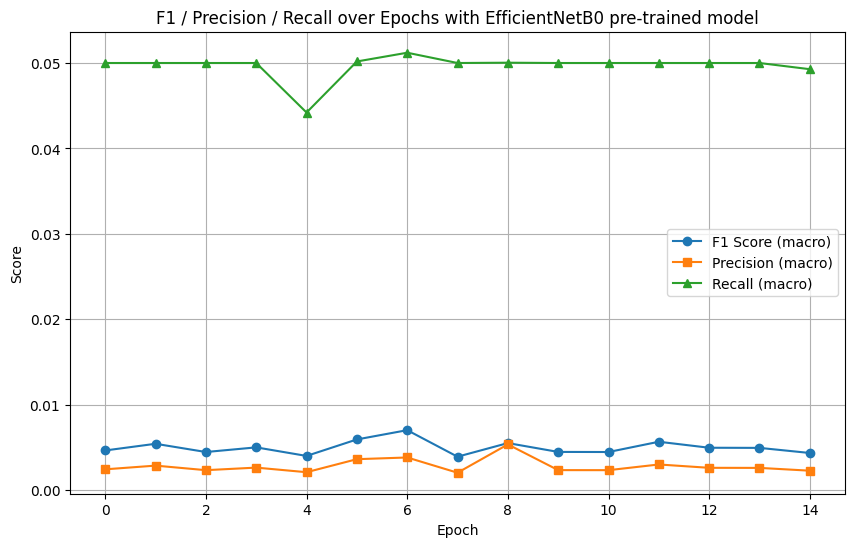

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(metrics_part3_EfficientNetB0_callback.f1_scores, label='F1 Score (macro)', marker='o')
plt.plot(metrics_part3_EfficientNetB0_callback.precision_scores, label='Precision (macro)', marker='s')
plt.plot(metrics_part3_EfficientNetB0_callback.recall_scores, label='Recall (macro)', marker='^')
plt.title('F1 / Precision / Recall over Epochs with EfficientNetB0 pre-trained model')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Compile using the EfficientNetB0 (32x32x3 input)
model_part3_EfficientNetB0 = MyCNN_with_transfer_learning(pretrained_model_EfficientNet)
model_part3_EfficientNetB0.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

metrics_part3_EfficientNetB0_callback = MetricsCallback(validation_data=(x_val_resized, y_val_to20))

history_part3 = model_part3_EfficientNetB0.fit(
    x_train_resized, y_train_to20, epochs=15, batch_size=10, validation_data=(x_val_resized, y_val_to20), callbacks=[metrics_part3_EfficientNetB0_callback]
    )


Epoch 1/50
844/850 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0533 - loss: 3.4213
Epoch 1 — F1: 0.0049, Precision: 0.0026, Recall: 0.0494
850/850 ━━━━━━━━━━━━━━━━━━━━ 44s 30ms/step - accuracy: 0.0533 - loss: 3.4206 - val_accuracy: 0.0507 - val_loss: 3.0399
Epoch 2/50
 25/850 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0442 - loss: 3.1851

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


847/850 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0530 - loss: 3.2005
Epoch 2 — F1: 0.0196, Precision: 0.0192, Recall: 0.0639
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0530 - loss: 3.2004 - val_accuracy: 0.0687 - val_loss: 2.9984
Epoch 3/50
 13/850 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0572 - loss: 3.1563 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


844/850 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0544 - loss: 3.1335
Epoch 3 — F1: 0.0090, Precision: 0.0053, Recall: 0.0546
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0544 - loss: 3.1335 - val_accuracy: 0.0567 - val_loss: 3.0026
Epoch 4/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


844/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0506 - loss: 3.1075
Epoch 4 — F1: 0.0176, Precision: 0.0188, Recall: 0.0612
850/850 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.0506 - loss: 3.1075 - val_accuracy: 0.0587 - val_loss: 2.9904
Epoch 5/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


843/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0529 - loss: 3.0905
Epoch 5 — F1: 0.0039, Precision: 0.0020, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0528 - loss: 3.0905 - val_accuracy: 0.0407 - val_loss: 2.9893
Epoch 6/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0526 - loss: 3.0717
Epoch 6 — F1: 0.0102, Precision: 0.0185, Recall: 0.0539
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0526 - loss: 3.0717 - val_accuracy: 0.0580 - val_loss: 2.9837
Epoch 7/50
 27/850 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0395 - loss: 3.1375

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


842/850 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0487 - loss: 3.0766
Epoch 7 — F1: 0.0107, Precision: 0.0211, Recall: 0.0517
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0487 - loss: 3.0766 - val_accuracy: 0.0480 - val_loss: 2.9879
Epoch 8/50
 28/850 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0594 - loss: 3.0947

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


845/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0586 - loss: 3.0632
Epoch 8 — F1: 0.0167, Precision: 0.0126, Recall: 0.0669
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.0586 - loss: 3.0632 - val_accuracy: 0.0687 - val_loss: 2.9844
Epoch 9/50
 25/850 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0357 - loss: 3.0471

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


845/850 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0555 - loss: 3.0621
Epoch 9 — F1: 0.0189, Precision: 0.0203, Recall: 0.0590
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0555 - loss: 3.0621 - val_accuracy: 0.0613 - val_loss: 2.9818
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


846/850 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0561 - loss: 3.0568
Epoch 10 — F1: 0.0092, Precision: 0.0070, Recall: 0.0518
850/850 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.0561 - loss: 3.0569 - val_accuracy: 0.0567 - val_loss: 2.9803
Epoch 11/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


843/850 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0604 - loss: 3.0521
Epoch 11 — F1: 0.0118, Precision: 0.0065, Recall: 0.0666
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0604 - loss: 3.0521 - val_accuracy: 0.0673 - val_loss: 2.9842
Epoch 12/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


845/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0578 - loss: 3.0573
Epoch 12 — F1: 0.0073, Precision: 0.0051, Recall: 0.0463
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0578 - loss: 3.0573 - val_accuracy: 0.0447 - val_loss: 2.9854
Epoch 13/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


846/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0577 - loss: 3.0477
Epoch 13 — F1: 0.0213, Precision: 0.0438, Recall: 0.0623
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0577 - loss: 3.0477 - val_accuracy: 0.0613 - val_loss: 2.9823
Epoch 14/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


842/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0572 - loss: 3.0526
Epoch 14 — F1: 0.0169, Precision: 0.0195, Recall: 0.0623
850/850 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0572 - loss: 3.0526 - val_accuracy: 0.0687 - val_loss: 2.9692
Epoch 15/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0610 - loss: 3.0418
Epoch 15 — F1: 0.0123, Precision: 0.0069, Recall: 0.0620
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.0610 - loss: 3.0418 - val_accuracy: 0.0627 - val_loss: 2.9804
Epoch 16/50
 25/850 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0563 - loss: 3.0470

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


846/850 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0610 - loss: 3.0385
Epoch 16 — F1: 0.0230, Precision: 0.0152, Recall: 0.0645
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0610 - loss: 3.0385 - val_accuracy: 0.0640 - val_loss: 2.9728
Epoch 17/50
 13/850 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0324 - loss: 2.9651

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


846/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0603 - loss: 3.0420
Epoch 17 — F1: 0.0383, Precision: 0.0469, Recall: 0.0778
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0604 - loss: 3.0420 - val_accuracy: 0.0800 - val_loss: 2.9627
Epoch 18/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


844/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0600 - loss: 3.0398
Epoch 18 — F1: 0.0059, Precision: 0.0525, Recall: 0.0506
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0600 - loss: 3.0398 - val_accuracy: 0.0500 - val_loss: 3.0282
Epoch 19/50
 26/850 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0531 - loss: 3.0838

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


843/850 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0568 - loss: 3.0431
Epoch 19 — F1: 0.0105, Precision: 0.0059, Recall: 0.0547
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0569 - loss: 3.0431 - val_accuracy: 0.0500 - val_loss: 3.0038
Epoch 20/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0587 - loss: 3.0333
Epoch 20 — F1: 0.0047, Precision: 0.0025, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.0587 - loss: 3.0333 - val_accuracy: 0.0493 - val_loss: 3.0177
Epoch 21/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


847/850 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0658 - loss: 3.0297
Epoch 21 — F1: 0.0106, Precision: 0.0146, Recall: 0.0486
850/850 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.0658 - loss: 3.0297 - val_accuracy: 0.0460 - val_loss: 2.9754
Epoch 22/50
 17/850 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0457 - loss: 3.0354

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


847/850 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0622 - loss: 3.0345
Epoch 22 — F1: 0.0070, Precision: 0.0168, Recall: 0.0512
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0622 - loss: 3.0345 - val_accuracy: 0.0507 - val_loss: 2.9882
Epoch 23/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


843/850 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0625 - loss: 3.0279
Epoch 23 — F1: 0.0059, Precision: 0.0096, Recall: 0.0506
850/850 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.0625 - loss: 3.0279 - val_accuracy: 0.0500 - val_loss: 3.0258
Epoch 24/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


844/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0610 - loss: 3.0251
Epoch 24 — F1: 0.0234, Precision: 0.0182, Recall: 0.0698
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.0610 - loss: 3.0251 - val_accuracy: 0.0680 - val_loss: 2.9602
Epoch 25/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0677 - loss: 3.0229
Epoch 25 — F1: 0.0177, Precision: 0.0362, Recall: 0.0575
850/850 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.0677 - loss: 3.0229 - val_accuracy: 0.0560 - val_loss: 2.9614
Epoch 26/50
 22/850 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0428 - loss: 3.0821

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0627 - loss: 3.0226
Epoch 26 — F1: 0.0273, Precision: 0.0278, Recall: 0.0776
850/850 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.0627 - loss: 3.0226 - val_accuracy: 0.0747 - val_loss: 2.9593
Epoch 27/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0631 - loss: 3.0142
Epoch 27 — F1: 0.0134, Precision: 0.0084, Recall: 0.0552
850/850 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.0631 - loss: 3.0142 - val_accuracy: 0.0587 - val_loss: 3.1023
Epoch 28/50
  9/850 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.0722 - loss: 3.0654

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0653 - loss: 3.0109
Epoch 28 — F1: 0.0059, Precision: 0.0525, Recall: 0.0506
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.0653 - loss: 3.0109 - val_accuracy: 0.0500 - val_loss: 3.0458
Epoch 29/50
 26/850 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0644 - loss: 3.0434

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0647 - loss: 3.0259
Epoch 29 — F1: 0.0222, Precision: 0.0197, Recall: 0.0700
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.0647 - loss: 3.0259 - val_accuracy: 0.0687 - val_loss: 2.9677
Epoch 30/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0659 - loss: 3.0175
Epoch 30 — F1: 0.0090, Precision: 0.0050, Recall: 0.0562
850/850 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.0659 - loss: 3.0175 - val_accuracy: 0.0553 - val_loss: 3.0743
Epoch 31/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


844/850 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0697 - loss: 3.0088
Epoch 31 — F1: 0.0052, Precision: 0.0027, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.0697 - loss: 3.0088 - val_accuracy: 0.0547 - val_loss: 3.1129
Epoch 32/50
 23/850 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0639 - loss: 3.0009

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


848/850 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0676 - loss: 3.0067
Epoch 32 — F1: 0.0133, Precision: 0.0078, Recall: 0.0553
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.0676 - loss: 3.0067 - val_accuracy: 0.0580 - val_loss: 3.0174
Epoch 33/50
 27/850 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0542 - loss: 2.9854

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


844/850 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0630 - loss: 3.0133
Epoch 33 — F1: 0.0357, Precision: 0.0419, Recall: 0.0731
850/850 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0630 - loss: 3.0133 - val_accuracy: 0.0707 - val_loss: 2.9650
Epoch 34/50
 26/850 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0838 - loss: 2.9740

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


846/850 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0716 - loss: 3.0026
Epoch 34 — F1: 0.0052, Precision: 0.0027, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.0716 - loss: 3.0027 - val_accuracy: 0.0547 - val_loss: 3.0486
Epoch 35/50
  8/850 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.0649 - loss: 3.0130

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


848/850 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0651 - loss: 3.0112
Epoch 35 — F1: 0.0123, Precision: 0.0091, Recall: 0.0567
850/850 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0651 - loss: 3.0112 - val_accuracy: 0.0613 - val_loss: 2.9807
Epoch 36/50
  3/850 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.0667 - loss: 2.9743      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


845/850 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0705 - loss: 3.0097
Epoch 36 — F1: 0.0170, Precision: 0.0128, Recall: 0.0577
850/850 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0704 - loss: 3.0097 - val_accuracy: 0.0587 - val_loss: 3.0408
Epoch 37/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


847/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0686 - loss: 3.0037
Epoch 37 — F1: 0.0107, Precision: 0.0126, Recall: 0.0498
850/850 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.0686 - loss: 3.0037 - val_accuracy: 0.0540 - val_loss: 3.0267
Epoch 38/50
 26/850 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0490 - loss: 2.9986

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


846/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0607 - loss: 3.0107
Epoch 38 — F1: 0.0047, Precision: 0.0025, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0607 - loss: 3.0107 - val_accuracy: 0.0493 - val_loss: 3.0360
Epoch 39/50
 26/850 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0593 - loss: 3.0311

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0665 - loss: 3.0056
Epoch 39 — F1: 0.0052, Precision: 0.0027, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0665 - loss: 3.0056 - val_accuracy: 0.0547 - val_loss: 3.0209
Epoch 40/50
 27/850 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0677 - loss: 3.0205

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


845/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0744 - loss: 3.0013
Epoch 40 — F1: 0.0088, Precision: 0.0048, Recall: 0.0536
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0744 - loss: 3.0013 - val_accuracy: 0.0533 - val_loss: 2.9947
Epoch 41/50
 25/850 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0490 - loss: 3.0056

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0639 - loss: 2.9987
Epoch 41 — F1: 0.0160, Precision: 0.0123, Recall: 0.0526
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0639 - loss: 2.9987 - val_accuracy: 0.0533 - val_loss: 3.0056
Epoch 42/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0634 - loss: 3.0037
Epoch 42 — F1: 0.0359, Precision: 0.0272, Recall: 0.0857
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0634 - loss: 3.0037 - val_accuracy: 0.0820 - val_loss: 2.9440
Epoch 43/50
 26/850 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0709 - loss: 3.0333

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0670 - loss: 3.0026
Epoch 43 — F1: 0.0047, Precision: 0.0025, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.0670 - loss: 3.0026 - val_accuracy: 0.0493 - val_loss: 3.2541
Epoch 44/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


845/850 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0736 - loss: 2.9960
Epoch 44 — F1: 0.0298, Precision: 0.0373, Recall: 0.0896
850/850 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.0736 - loss: 2.9960 - val_accuracy: 0.0847 - val_loss: 2.9391
Epoch 45/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0663 - loss: 2.9971
Epoch 45 — F1: 0.0125, Precision: 0.0097, Recall: 0.0547
850/850 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.0663 - loss: 2.9971 - val_accuracy: 0.0587 - val_loss: 2.9798
Epoch 46/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


848/850 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0755 - loss: 2.9985
Epoch 46 — F1: 0.0047, Precision: 0.0025, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.0754 - loss: 2.9985 - val_accuracy: 0.0493 - val_loss: 3.0761
Epoch 47/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0643 - loss: 2.9967
Epoch 47 — F1: 0.0136, Precision: 0.0082, Recall: 0.0627
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.0643 - loss: 2.9967 - val_accuracy: 0.0633 - val_loss: 2.9564
Epoch 48/50
 25/850 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0829 - loss: 2.9471

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0728 - loss: 2.9826
Epoch 48 — F1: 0.0047, Precision: 0.0025, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.0728 - loss: 2.9826 - val_accuracy: 0.0493 - val_loss: 3.0012
Epoch 49/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


847/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0687 - loss: 2.9875
Epoch 49 — F1: 0.0087, Precision: 0.0048, Recall: 0.0456
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0686 - loss: 2.9876 - val_accuracy: 0.0460 - val_loss: 3.0809
Epoch 50/50
 26/850 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0378 - loss: 2.9626

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0659 - loss: 2.9800
Epoch 50 — F1: 0.0083, Precision: 0.0048, Recall: 0.0503
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0659 - loss: 2.9800 - val_accuracy: 0.0500 - val_loss: 3.0104


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


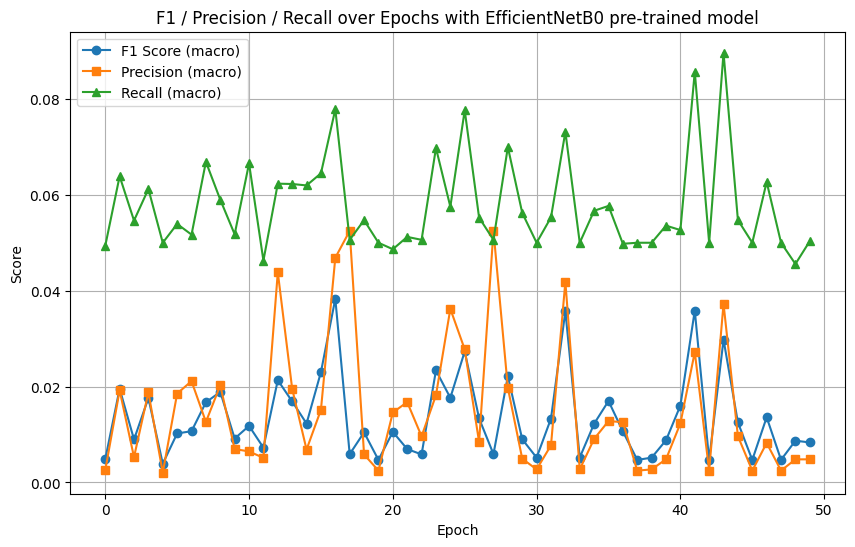

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(metrics_part3_EfficientNetB0_callback.f1_scores, label='F1 Score (macro)', marker='o')
plt.plot(metrics_part3_EfficientNetB0_callback.precision_scores, label='Precision (macro)', marker='s')
plt.plot(metrics_part3_EfficientNetB0_callback.recall_scores, label='Recall (macro)', marker='^')
plt.title('F1 / Precision / Recall over Epochs with EfficientNetB0 pre-trained model')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

**ΣΧΟΛΙΑΣΜΟΣ ΑΠΟΤΕΛΕΣΜΑΤΩΝ**

Αυτό που παρατηρούμε είναι ότι κανένα από τα δυο pre-trained μοντέλα δεν δίνουν στο μοντέλο μας καλύτερο αποτέλεσμα F1 score. Το EfficientNetB0 δεν προσφέρει κανένα καλό χαρακτηριστικό, ίσα ίσα που η F1 score μετρική καταλήγει να είναι πολύ μικρότερη του 10%. To VGG19 δίνει καλά αποτελέσματα σε σύγκριση με το άλλο προ-εκπαιδευμένο μοντέλο. Ωστόσο ούτε αυτού η μετρική f1 score ίση με *0.5506* υπερνικά του απλού μας μοντέλου με dropout και data augmentation. Αυτό δεν ήταν κάτι που περιμέναμε, ωστόσο μπορεί το training dataset με το οποίο έχουν προεκπαιδευτεί τα μοντέλα να μην καλύπτει ικανοποιητικά το subset του dataset CIFAR-100 που κληθήκαμε να χρησιμοποιήσουμε εμείς (με διαφορετικό seed κάθε φοιτητής).

Δοκιμάσαμε, επιπλέον, δυο προσεγγίσεις. Συγκεκριμένα, η τιμή f1 score ιση με 0.5506 αντιστοιχεί στο μοντέλο με είσοδο εικόνες μεγέθους 224x224x3 έναντι του f1 score ίσο με 0.4937 που αντιστοιχεί στο μοντέλο με είσοδο εικόνες μεγέθους 32x32x3. Αυτό είναι λογικό καθώς τα προεκπαιδευμένα μοντέλα έχουν εκπαιδευτεί με εισόδους εικόνες μεγέθους 224x224x3 και άρα τα βάρη ανταποκρίνονται καλύτερα σε αυτά τα μεγέθοι. Τα features που γνωρίζουν τα μοντέλα, και δεδομένου ότι έχουμε εφαρμόσει freeze (δεν επανεκπαιδεύονται τα Layers τους), καλύτερη απόδοση έχουμε όσο πιο κοντά είναι τα δεδομένα μας στο σύνολο δεδομένων με το οποίο εκπαιδεύτηκαν.

- Βήμα 2

In [ ]:
def unfreeze_last_20_percent(model): # Fine-20
    total_layers = len(model.layers)

    # Freeze the first 80% of the layers
    for layer in model.layers[:int(total_layers * 0.8)]:
        layer.trainable = False

    # Unfreeze the last 20% of the layers
    for layer in model.layers[int(total_layers * 0.8):]:
        layer.trainable = True

    return model

Λόγω απουσίας πόρων και επειδή είχα τρέξει αρχικά τα training με input 32x32x3 παραμένουν αυτά τα αποτελέσματα για 50 εποχές.

In [ ]:
# Pre-trained models
pretrained_model_VGG = tf.keras.applications.VGG19(input_shape=(32,32,3), include_top=False)
pretrained_model_EfficientNet = tf.keras.applications.efficientnet.EfficientNetB0(input_shape=(32,32,3), include_top=False)
pretrained_model_VGG.trainable = False
pretrained_model_EfficientNet.trainable=False

In [ ]:
# Create a MyCNN_2 model variant using the pre-trained model as a base
# For pre-trained model VGG19 that has almost 23 layers
def MyCNN_with_transfer_learning_VGG():
  base_model = pretrained_model_VGG
  base_model = unfreeze_last_20_percent(base_model)

  model = models.Sequential([
      base_model,

      # Fully Connected
      layers.Flatten(),
      layers.Dense(512, activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(20)
  ])
  return model

In [ ]:
# Compile using the VGG19 and reduced layers for training
model_vgg19 = MyCNN_with_transfer_learning_VGG()
model_vgg19.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

metrics_vgg19_callback = MetricsCallback(validation_data=(x_val, y_val_to20))

history_vgg19 = model_vgg19.fit(
    x_train, y_train_to20, epochs=15, batch_size=10, validation_data=(x_val, y_val_to20), callbacks=[metrics_vgg19_callback]
    )


Epoch 1/50
846/850 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2228 - loss: 2.6996
Epoch 1 — F1: 0.3706, Precision: 0.4784, Recall: 0.3818
850/850 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.2233 - loss: 2.6975 - val_accuracy: 0.3800 - val_loss: 2.1083
Epoch 2/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


846/850 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4568 - loss: 1.7604
Epoch 2 — F1: 0.4504, Precision: 0.5152, Recall: 0.4737
850/850 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.4569 - loss: 1.7601 - val_accuracy: 0.4693 - val_loss: 1.7396
Epoch 3/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5357 - loss: 1.4742
Epoch 3 — F1: 0.5018, Precision: 0.5795, Recall: 0.5045
850/850 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5357 - loss: 1.4742 - val_accuracy: 0.4980 - val_loss: 1.7100
Epoch 4/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5715 - loss: 1.3468
Epoch 4 — F1: 0.5171, Precision: 0.5896, Recall: 0.5299
850/850 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5715 - loss: 1.3468 - val_accuracy: 0.5313 - val_loss: 1.6816
Epoch 5/50
848/850 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6216 - loss: 1.1824
Epoch 5 — F1: 0.5200, Precision: 0.5973, Recall: 0.5321
850/850 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.6215 - loss: 1.1826 - val

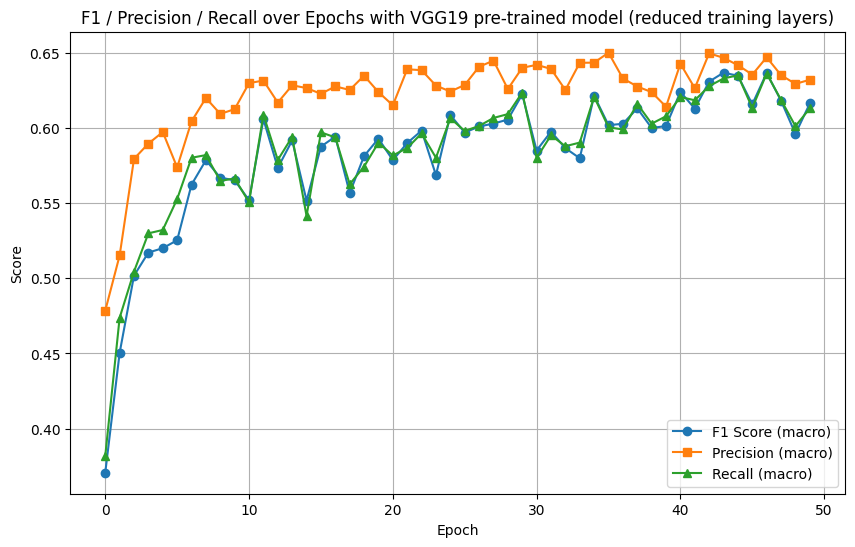

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(metrics_vgg19_callback.f1_scores, label='F1 Score (macro)', marker='o')
plt.plot(metrics_vgg19_callback.precision_scores, label='Precision (macro)', marker='s')
plt.plot(metrics_vgg19_callback.recall_scores, label='Recall (macro)', marker='^')
plt.title('F1 / Precision / Recall over Epochs with VGG19 pre-trained model (reduced training layers)')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a MyCNN_2 model variant using the pre-trained model as a base
# For pre-trained model EfficientNetB0 that has almost 239 layers
def MyCNN_with_transfer_learning_EfficientNetB0():
  base_model = pretrained_model_EfficientNet
  base_model = unfreeze_last_20_percent(base_model)

  model = models.Sequential([
      base_model,

      # Fully Connected
      layers.Flatten(),
      layers.Dense(512, activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(20)
  ])
  return model

In [ ]:
# Compile using the EfficientNetB0
model_EfficientNetB0 = MyCNN_with_transfer_learning_EfficientNetB0()
model_EfficientNetB0.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

metrics_EfficientNetB0_callback = MetricsCallback(validation_data=(x_val, y_val_to20))

history_efficientnetb0 = model_EfficientNetB0.fit(
    x_train, y_train_to20, epochs=15, batch_size=10, validation_data=(x_val, y_val_to20), callbacks=[metrics_EfficientNetB0_callback]
    )


Epoch 1/50
844/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0471 - loss: 4.1597
Epoch 1 — F1: 0.0094, Precision: 0.0067, Recall: 0.0452
850/850 ━━━━━━━━━━━━━━━━━━━━ 57s 41ms/step - accuracy: 0.0471 - loss: 4.1577 - val_accuracy: 0.0460 - val_loss: 3.0555
Epoch 2/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0524 - loss: 3.5773
Epoch 2 — F1: 0.0043, Precision: 0.0023, Recall: 0.0493
850/850 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - accuracy: 0.0524 - loss: 3.5772 - val_accuracy: 0.0440 - val_loss: 3.0260
Epoch 3/50
 22/850 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0336 - loss: 3.3788

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0462 - loss: 3.3866
Epoch 3 — F1: 0.0101, Precision: 0.0063, Recall: 0.0507
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0462 - loss: 3.3865 - val_accuracy: 0.0527 - val_loss: 3.0480
Epoch 4/50
 24/850 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0332 - loss: 3.4094

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0544 - loss: 3.3273
Epoch 4 — F1: 0.0049, Precision: 0.0026, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0544 - loss: 3.3273 - val_accuracy: 0.0520 - val_loss: 3.0169
Epoch 5/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


848/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0533 - loss: 3.2702
Epoch 5 — F1: 0.0103, Precision: 0.0178, Recall: 0.0526
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0534 - loss: 3.2703 - val_accuracy: 0.0553 - val_loss: 3.0240
Epoch 6/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0500 - loss: 3.2626
Epoch 6 — F1: 0.0052, Precision: 0.0028, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0500 - loss: 3.2626 - val_accuracy: 0.0553 - val_loss: 3.0253
Epoch 7/50
 13/850 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.1262 - loss: 3.0506 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


845/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0660 - loss: 3.2377
Epoch 7 — F1: 0.0061, Precision: 0.0038, Recall: 0.0519
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.0660 - loss: 3.2377 - val_accuracy: 0.0447 - val_loss: 3.0999
Epoch 8/50
 23/850 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0348 - loss: 3.3300

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0479 - loss: 3.2506
Epoch 8 — F1: 0.0046, Precision: 0.0024, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.0479 - loss: 3.2506 - val_accuracy: 0.0487 - val_loss: 3.0408
Epoch 9/50
  9/850 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.0235 - loss: 3.3144

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


848/850 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0587 - loss: 3.2181
Epoch 9 — F1: 0.0050, Precision: 0.0026, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.0587 - loss: 3.2181 - val_accuracy: 0.0527 - val_loss: 3.0149
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0626 - loss: 3.2146
Epoch 10 — F1: 0.0085, Precision: 0.0111, Recall: 0.0514
850/850 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.0626 - loss: 3.2146 - val_accuracy: 0.0567 - val_loss: 3.0237
Epoch 11/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


845/850 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0623 - loss: 3.2097
Epoch 11 — F1: 0.0228, Precision: 0.0327, Recall: 0.0778
850/850 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.0623 - loss: 3.2096 - val_accuracy: 0.0807 - val_loss: 2.9937
Epoch 12/50
 13/850 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0463 - loss: 3.1508

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0557 - loss: 3.2064
Epoch 12 — F1: 0.0105, Precision: 0.0143, Recall: 0.0533
850/850 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.0557 - loss: 3.2064 - val_accuracy: 0.0500 - val_loss: 3.0177
Epoch 13/50
 24/850 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0717 - loss: 3.1793

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0675 - loss: 3.1751
Epoch 13 — F1: 0.0060, Precision: 0.0275, Recall: 0.0506
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.0675 - loss: 3.1751 - val_accuracy: 0.0500 - val_loss: 3.0910
Epoch 14/50
 11/850 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0848 - loss: 3.1295

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


844/850 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0634 - loss: 3.1730
Epoch 14 — F1: 0.0101, Precision: 0.0693, Recall: 0.0514
850/850 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0634 - loss: 3.1730 - val_accuracy: 0.0560 - val_loss: 3.0221
Epoch 15/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


843/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0682 - loss: 3.1672
Epoch 15 — F1: 0.0140, Precision: 0.0077, Recall: 0.0728
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.0682 - loss: 3.1672 - val_accuracy: 0.0780 - val_loss: 3.0718
Epoch 16/50
 24/850 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0601 - loss: 3.1885

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0677 - loss: 3.1600
Epoch 16 — F1: 0.0049, Precision: 0.0026, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0677 - loss: 3.1600 - val_accuracy: 0.0520 - val_loss: 3.3329
Epoch 17/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0726 - loss: 3.1271
Epoch 17 — F1: 0.0046, Precision: 0.0024, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.0726 - loss: 3.1271 - val_accuracy: 0.0487 - val_loss: 2.9970
Epoch 18/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


848/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0744 - loss: 3.1452
Epoch 18 — F1: 0.0116, Precision: 0.0064, Recall: 0.0615
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0744 - loss: 3.1452 - val_accuracy: 0.0620 - val_loss: 3.2768
Epoch 19/50
 13/850 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.1024 - loss: 3.1213

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


848/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0812 - loss: 3.1186
Epoch 19 — F1: 0.0049, Precision: 0.0026, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.0812 - loss: 3.1185 - val_accuracy: 0.0520 - val_loss: 3.0440
Epoch 20/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0785 - loss: 3.1061
Epoch 20 — F1: 0.0188, Precision: 0.0122, Recall: 0.0768
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0785 - loss: 3.1061 - val_accuracy: 0.0820 - val_loss: 3.0404
Epoch 21/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


842/850 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0824 - loss: 3.1026
Epoch 21 — F1: 0.0061, Precision: 0.0040, Recall: 0.0513
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0824 - loss: 3.1027 - val_accuracy: 0.0480 - val_loss: 3.1324
Epoch 22/50
 24/850 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0699 - loss: 3.0454

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


844/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0746 - loss: 3.1010
Epoch 22 — F1: 0.0103, Precision: 0.0253, Recall: 0.0526
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0746 - loss: 3.1010 - val_accuracy: 0.0627 - val_loss: 3.1199
Epoch 23/50
 16/850 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0895 - loss: 3.0902

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


845/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0817 - loss: 3.0826
Epoch 23 — F1: 0.0050, Precision: 0.0026, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.0817 - loss: 3.0826 - val_accuracy: 0.0520 - val_loss: 3.0815
Epoch 24/50
 24/850 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0804 - loss: 3.0808

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


847/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0839 - loss: 3.0787
Epoch 24 — F1: 0.0210, Precision: 0.0280, Recall: 0.0700
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0839 - loss: 3.0787 - val_accuracy: 0.0680 - val_loss: 3.0128
Epoch 25/50
 25/850 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1134 - loss: 3.0524

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0900 - loss: 3.0618
Epoch 25 — F1: 0.0161, Precision: 0.0093, Recall: 0.0693
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0900 - loss: 3.0618 - val_accuracy: 0.0753 - val_loss: 3.0106
Epoch 26/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


843/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0902 - loss: 3.0607
Epoch 26 — F1: 0.0169, Precision: 0.0098, Recall: 0.0718
850/850 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.0902 - loss: 3.0606 - val_accuracy: 0.0807 - val_loss: 3.5042
Epoch 27/50
 26/850 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0762 - loss: 2.9233

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


845/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0828 - loss: 3.0561
Epoch 27 — F1: 0.0113, Precision: 0.0064, Recall: 0.0612
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0828 - loss: 3.0562 - val_accuracy: 0.0660 - val_loss: 3.1016
Epoch 28/50
 25/850 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1088 - loss: 3.0184

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


845/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0919 - loss: 3.0344
Epoch 28 — F1: 0.0308, Precision: 0.0227, Recall: 0.0742
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0919 - loss: 3.0343 - val_accuracy: 0.0747 - val_loss: 3.0034
Epoch 29/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


845/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1009 - loss: 3.0444
Epoch 29 — F1: 0.0161, Precision: 0.0090, Recall: 0.0831
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1008 - loss: 3.0444 - val_accuracy: 0.0800 - val_loss: 2.9670
Epoch 30/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


849/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0900 - loss: 3.0368
Epoch 30 — F1: 0.0050, Precision: 0.0026, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.0900 - loss: 3.0368 - val_accuracy: 0.0520 - val_loss: 3.0231
Epoch 31/50
 25/850 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0880 - loss: 3.0478

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


846/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0852 - loss: 3.0449
Epoch 31 — F1: 0.0049, Precision: 0.0026, Recall: 0.0500
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.0852 - loss: 3.0448 - val_accuracy: 0.0520 - val_loss: 3.4958
Epoch 32/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


846/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0933 - loss: 3.0164
Epoch 32 — F1: 0.0118, Precision: 0.0073, Recall: 0.0615
850/850 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0933 - loss: 3.0163 - val_accuracy: 0.0607 - val_loss: 3.0700
Epoch 33/50
 10/850 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0908 - loss: 3.0080 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


848/850 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1002 - loss: 3.0070
Epoch 33 — F1: 0.0176, Precision: 0.0151, Recall: 0.0553
850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.1002 - loss: 3.0070 - val_accuracy: 0.0647 - val_loss: 2.9914
Epoch 34/50
 25/850 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0684 - loss: 2.9876

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


597/850 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0940 - loss: 2.9956

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(metrics_EfficientNetB0_callback.f1_scores, label='F1 Score (macro)', marker='o')
plt.plot(metrics_EfficientNetB0_callback.precision_scores, label='Precision (macro)', marker='s')
plt.plot(metrics_EfficientNetB0_callback.recall_scores, label='Recall (macro)', marker='^')
plt.title('F1 / Precision / Recall over Epochs with EfficientNetB0 pre-trained model (reduced training layers)')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

**ΣΧΟΛΙΑΣΜΟΣ ΑΠΟΤΕΛΕΣΜΑΤΩΝ**

Παρόμοια με πριν, το μοντέλο μας εφαρμόζοντας του το pre-trained μοντέλο EfficientNetB0 βγάζει εξίσου άσχημα αποτελέσματα ακόμα και όταν του προσθέτουμε ορισμένα layers στην διαδικασία εκπαίδευσης.

Εφαρμόζοντας το pre-trained μοντέλο VGG19 βγάζουμε αρκετά καλύτερα αποτελέσματα από ότι προηγουμένως, με βελτιωμένο f1 score, ίσο με *0.6163*. Σαφώς καλύτερο αποτέλεσμα, χωρίς όμως να είναι βέλτιστο. Παρατηρούμε, επίσης, ότι το μοντέλο έχει υπερπροσαρμοστεί.

Τα βασικά πλεονεκτήματα της μεθόδου **transfer learning** είναι ότι χρησιμοποιώντας ένα ήδη εκπαιδευμένο μοντέλο ως βάση για το δικό μας, ενσωματώνοντας μόνο το FC επίπεδο, **επιταχύναμε σημαντικά την σύγκλιση της εκπαίδευσης** που εκτελέσαμε. Συγκεκριμένα, το μοντέλο ξεκινάει ήδη από 'έξυπνα' βάρη, καθώς τα μοντέλα αυτά έχουν ήδη μάθει τα χρήσιμα χαρακτηριστικά από τεράστια datasets. Επομένως, το μοντέλο μας δεν χρειάζεται να επαναλάβει αυτή την γνώση από το μηδέν. Ένα ακόμα πλεονέκτημα της μεθόδου αυτής είναι ότι έχουμε **καλύτερη γενίκευση σε μικρότερα dataset**. Σε λίγα δεδομένα, όπως στην δική μας περίπτωση, η μεταφορά γνώσης βοηθάει στην αποφυγή του overfitting, ειδικά όταν το dataset με το οποίο έχει προεκπαιδευτεί το μοντέλο μοιάζει με το δικό μας.

**Διαφορά μεταξύ Freeze και Fine-tuning:** <br>
- Freeze: Τα επίπεδα του προ-εκπαιδευμένου μοντέλου παραμένουν μη-εκπαιδεύσιμα, διατηρώντας τα βάρη με τα οποία έχουν προεκπαιδευτεί.

- Fine-tuning: Ξεπαγώνουμε μερικά ή όλα τα επίπεδα του προεκπαιδευμένου μοντέλου και τα εκπαιδεύουμε ξανά, επιτρέποντας στο μοντέλο να μάθει από τα νέα δεδομένα και να προσαρμοστεί καλύτερα στο νέο dataset.

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data).

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).
